In [1]:
import matplotlib
matplotlib.use("nbagg")

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from utility import *
from model import *

from os import listdir
from os.path import isfile, join
import numpy as np
import math

polycube_path = "/Users/davidcleres/DeepShape/Polycubing-Automated/Generated-Cars/"
polycube_files = [f for f in listdir(polycube_path) if isfile(join(polycube_path, f))]

voxelized_mesh_path = "/Users/davidcleres/DeepShape/Polycubing-Automated/voxelizedMeshes/"
voxelized_mesh_files = [f for f in listdir(voxelized_mesh_path) if isfile(join(voxelized_mesh_path, f))]

voxelizedFiles = []
polycubedFiles = []

for f in voxelized_mesh_files: 
    if f[-13:] == "voxelized.txt":
        voxelizedFiles = np.hstack((voxelizedFiles, f))
    
for f in polycube_files:
    if f[-14:] == "finalCubes.txt":
        polycubedFiles = np.hstack((polycubedFiles, f))
        
grid_size = 32
voxelized_train_input, polycube_target=loadData(grid_size, polycube_path, voxelized_mesh_path, voxelizedFiles, polycubedFiles, loadFromScratch=True)
       
batch_size = 5 
preprocessed_input_train, preprocessed_input_validation, preprocessed_input_train_target, preprocessed_input_validation_target = preprocessing_train(voxelized_train_input, polycube_target,batch_size, False, False)

preprocessed_input_train = torch.from_numpy(preprocessed_input_train)
preprocessed_input_validation = torch.from_numpy(preprocessed_input_validation)
preprocessed_input_train_target = torch.from_numpy(preprocessed_input_train_target)
preprocessed_input_validation_target = torch.from_numpy(preprocessed_input_validation_target)

Ntrain = len(preprocessed_input_train[:, 0,0,0,0]) 
Nvalidation = len(preprocessed_input_validation[:,0,0,0,0])
image_size = 32

train_input = np.array(preprocessed_input_train.view(Ntrain, 1, image_size, image_size, image_size))
validation_input = np.array(preprocessed_input_validation.view(Nvalidation, 1, image_size, image_size, image_size))

labels_train = np.array(preprocessed_input_train_target.view(Ntrain, 1, image_size, image_size, image_size))
labels_validation = np.array(preprocessed_input_validation_target.view(Nvalidation, 1, image_size, image_size, image_size))

print('train', train_input.shape)
print('validation', validation_input.shape)
print('train_target', labels_train.shape)
print('validation_target', labels_validation.shape)

<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch.Size([32, 32, 32])
<class 'torch.IntTensor'> torch

In [2]:
def is_in_boudaries(x, y, z, grid_size): 
    return x < grid_size and y < grid_size and z < grid_size

def find_center_and_delta(labels_train, grid_size):
    for x in range (grid_size): 
        for y in range (grid_size): 
            for z in range (grid_size): 
                if labels_train[x, y, z] == 1:
                    x_init = x 
                    y_init = y
                    z_init = z
                    while (is_in_boudaries(x, y, z, grid_size) and labels_train[x, y, z] == 1): 
                        x=x+1
                    delta_x=int((x-x_init-1)/2)
                    center_x=int(x_init+delta_x)
                    print('found center in x at ', center_x)

                    while (is_in_boudaries(x, y, z, grid_size) and labels_train[center_x, y, z] == 1): 
                        y=y+1
                    delta_y=int((y-y_init-1)/2)
                    center_y=int(y_init+delta_y)
                    print('found center in y at ', center_y)
                    y=center_y

                    while (is_in_boudaries(x, y, z, grid_size) and labels_train[center_x, center_y, z] == 1): 
                        z=z+1
                    delta_z=int((z-z_init-1)/2)
                    center_z=int(z_init+delta_z)
                    print('found center in z at ', center_z)
                    z=center_z
                        
                    return delta_x, center_x, delta_y, center_y, delta_z, center_z

In [4]:
find_center_and_delta(labels_train[0, 0, :, :, :], grid_size=32)

found center in x at  5
found center in y at  3
found center in z at  15


(5, 5, 3, 3, 15, 15)

<IPython.core.display.Javascript object>


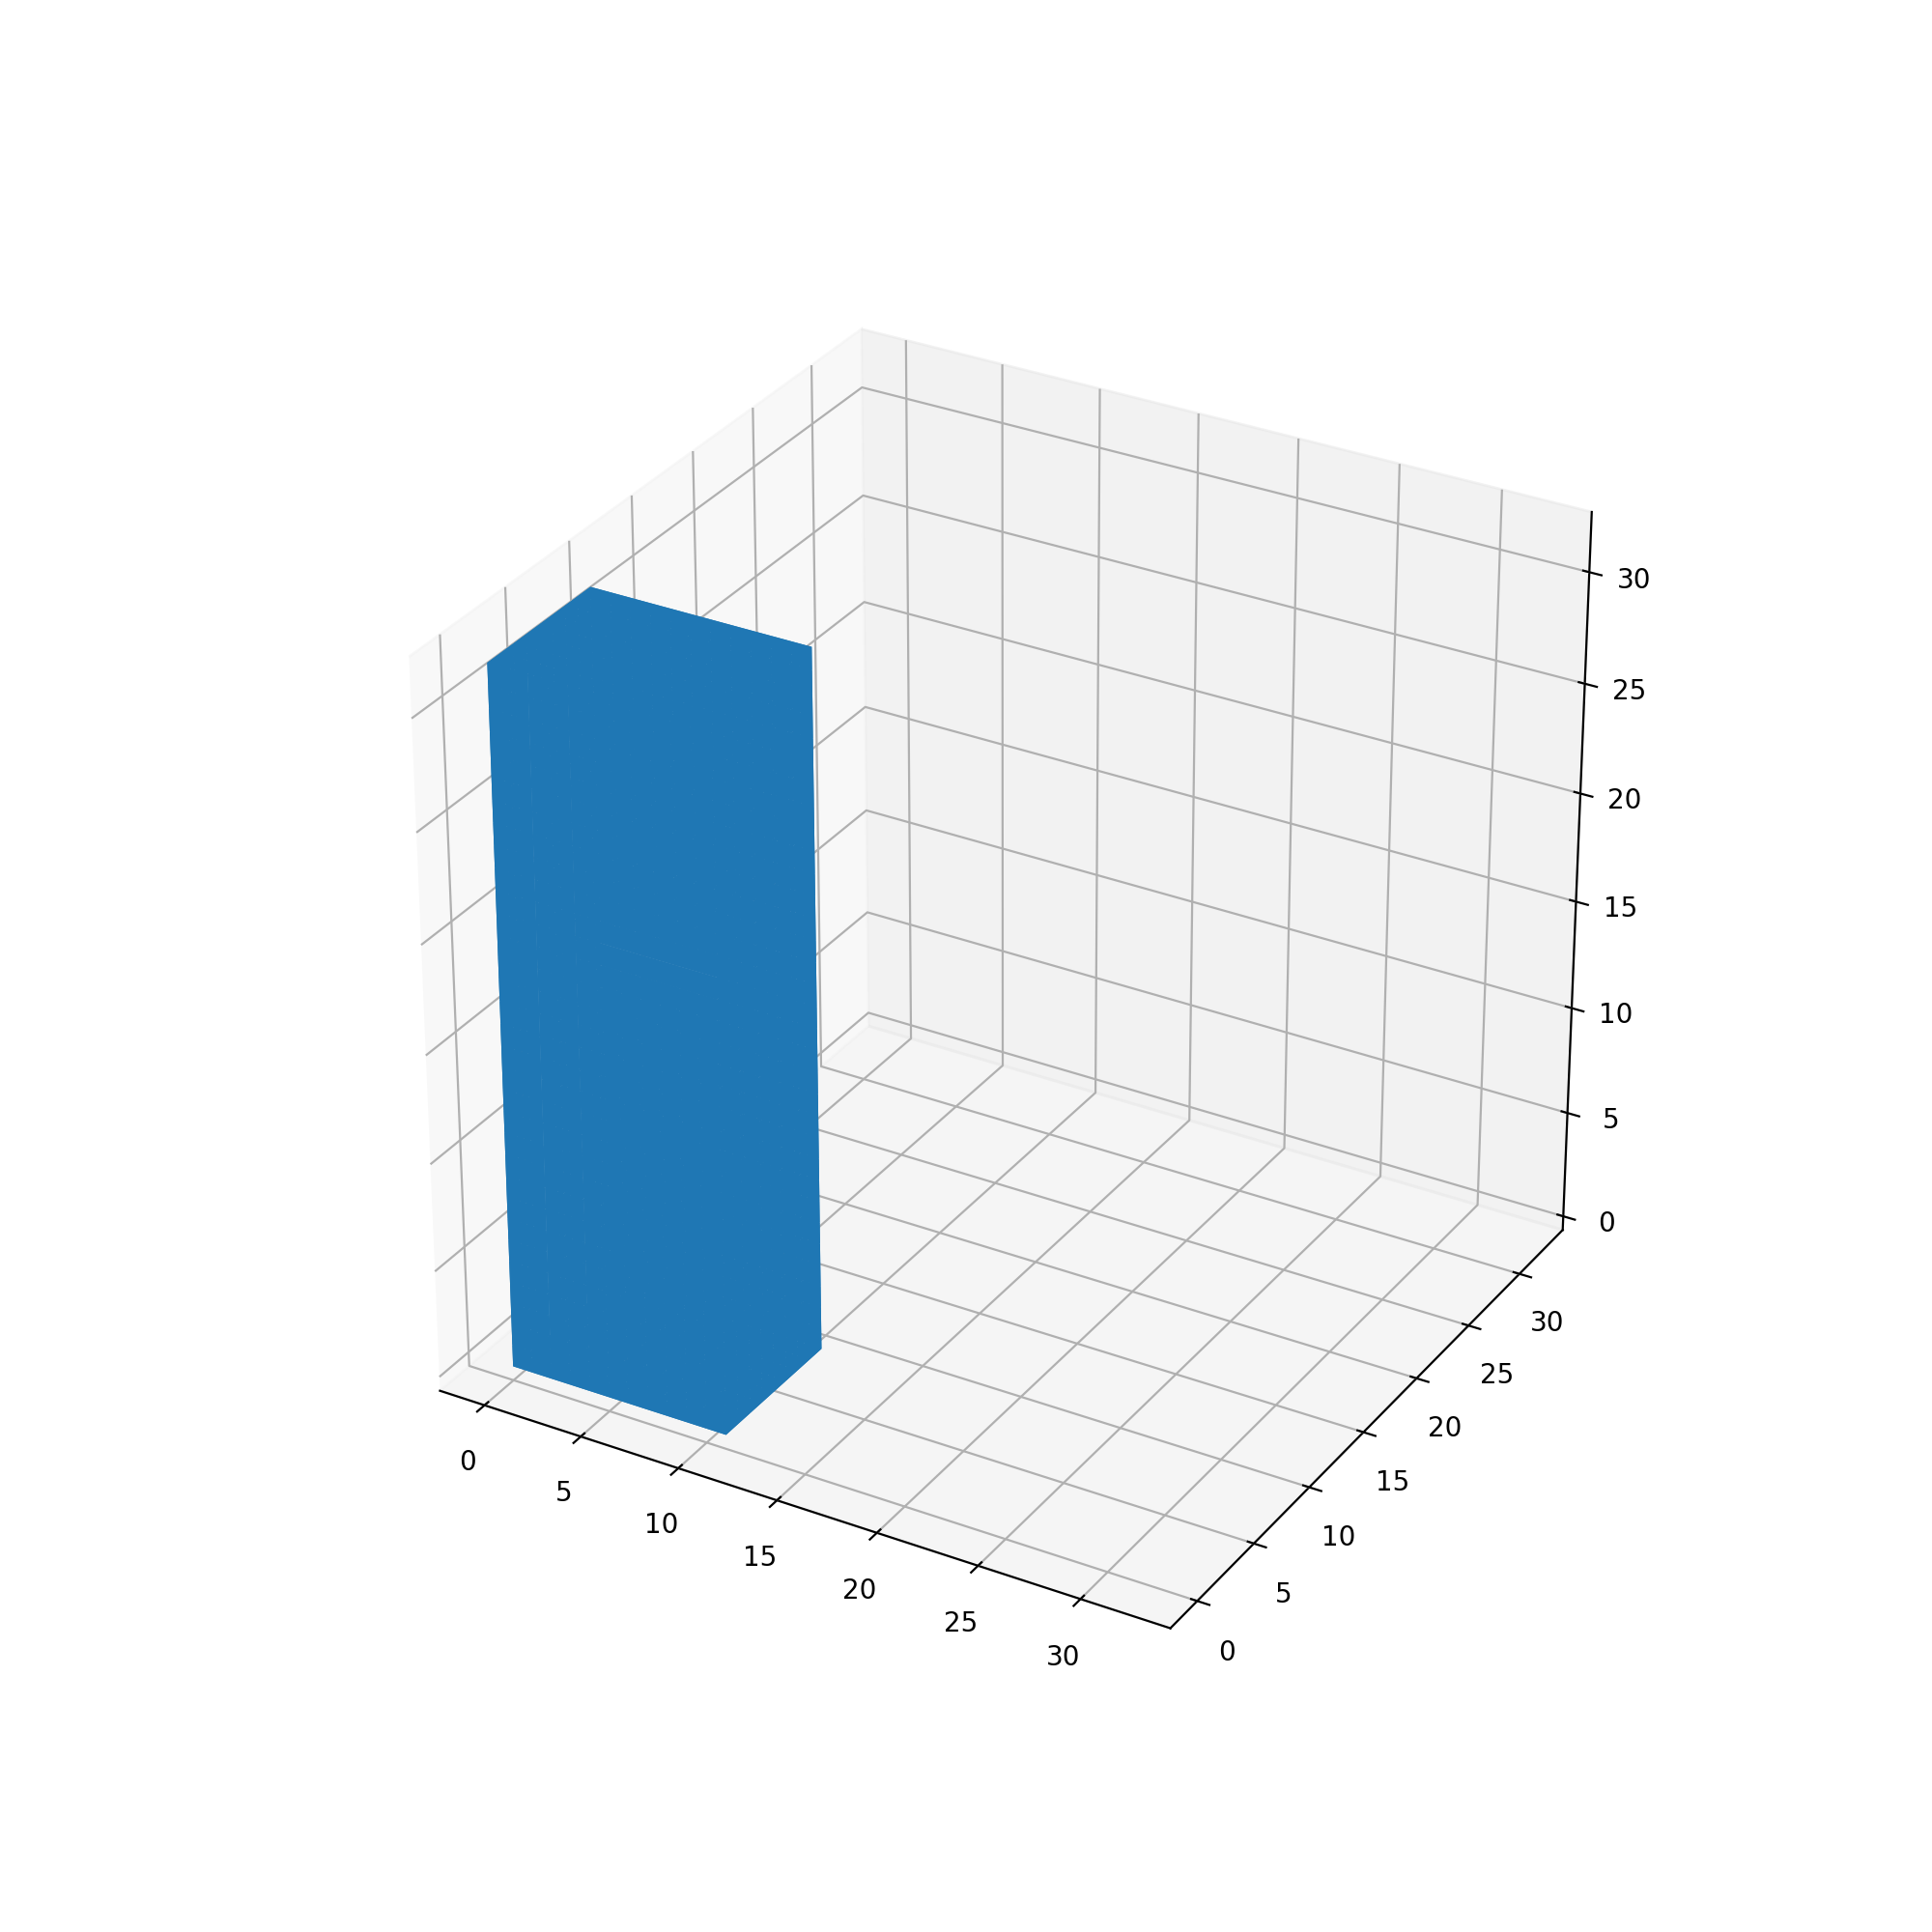

<IPython.core.display.Javascript object>


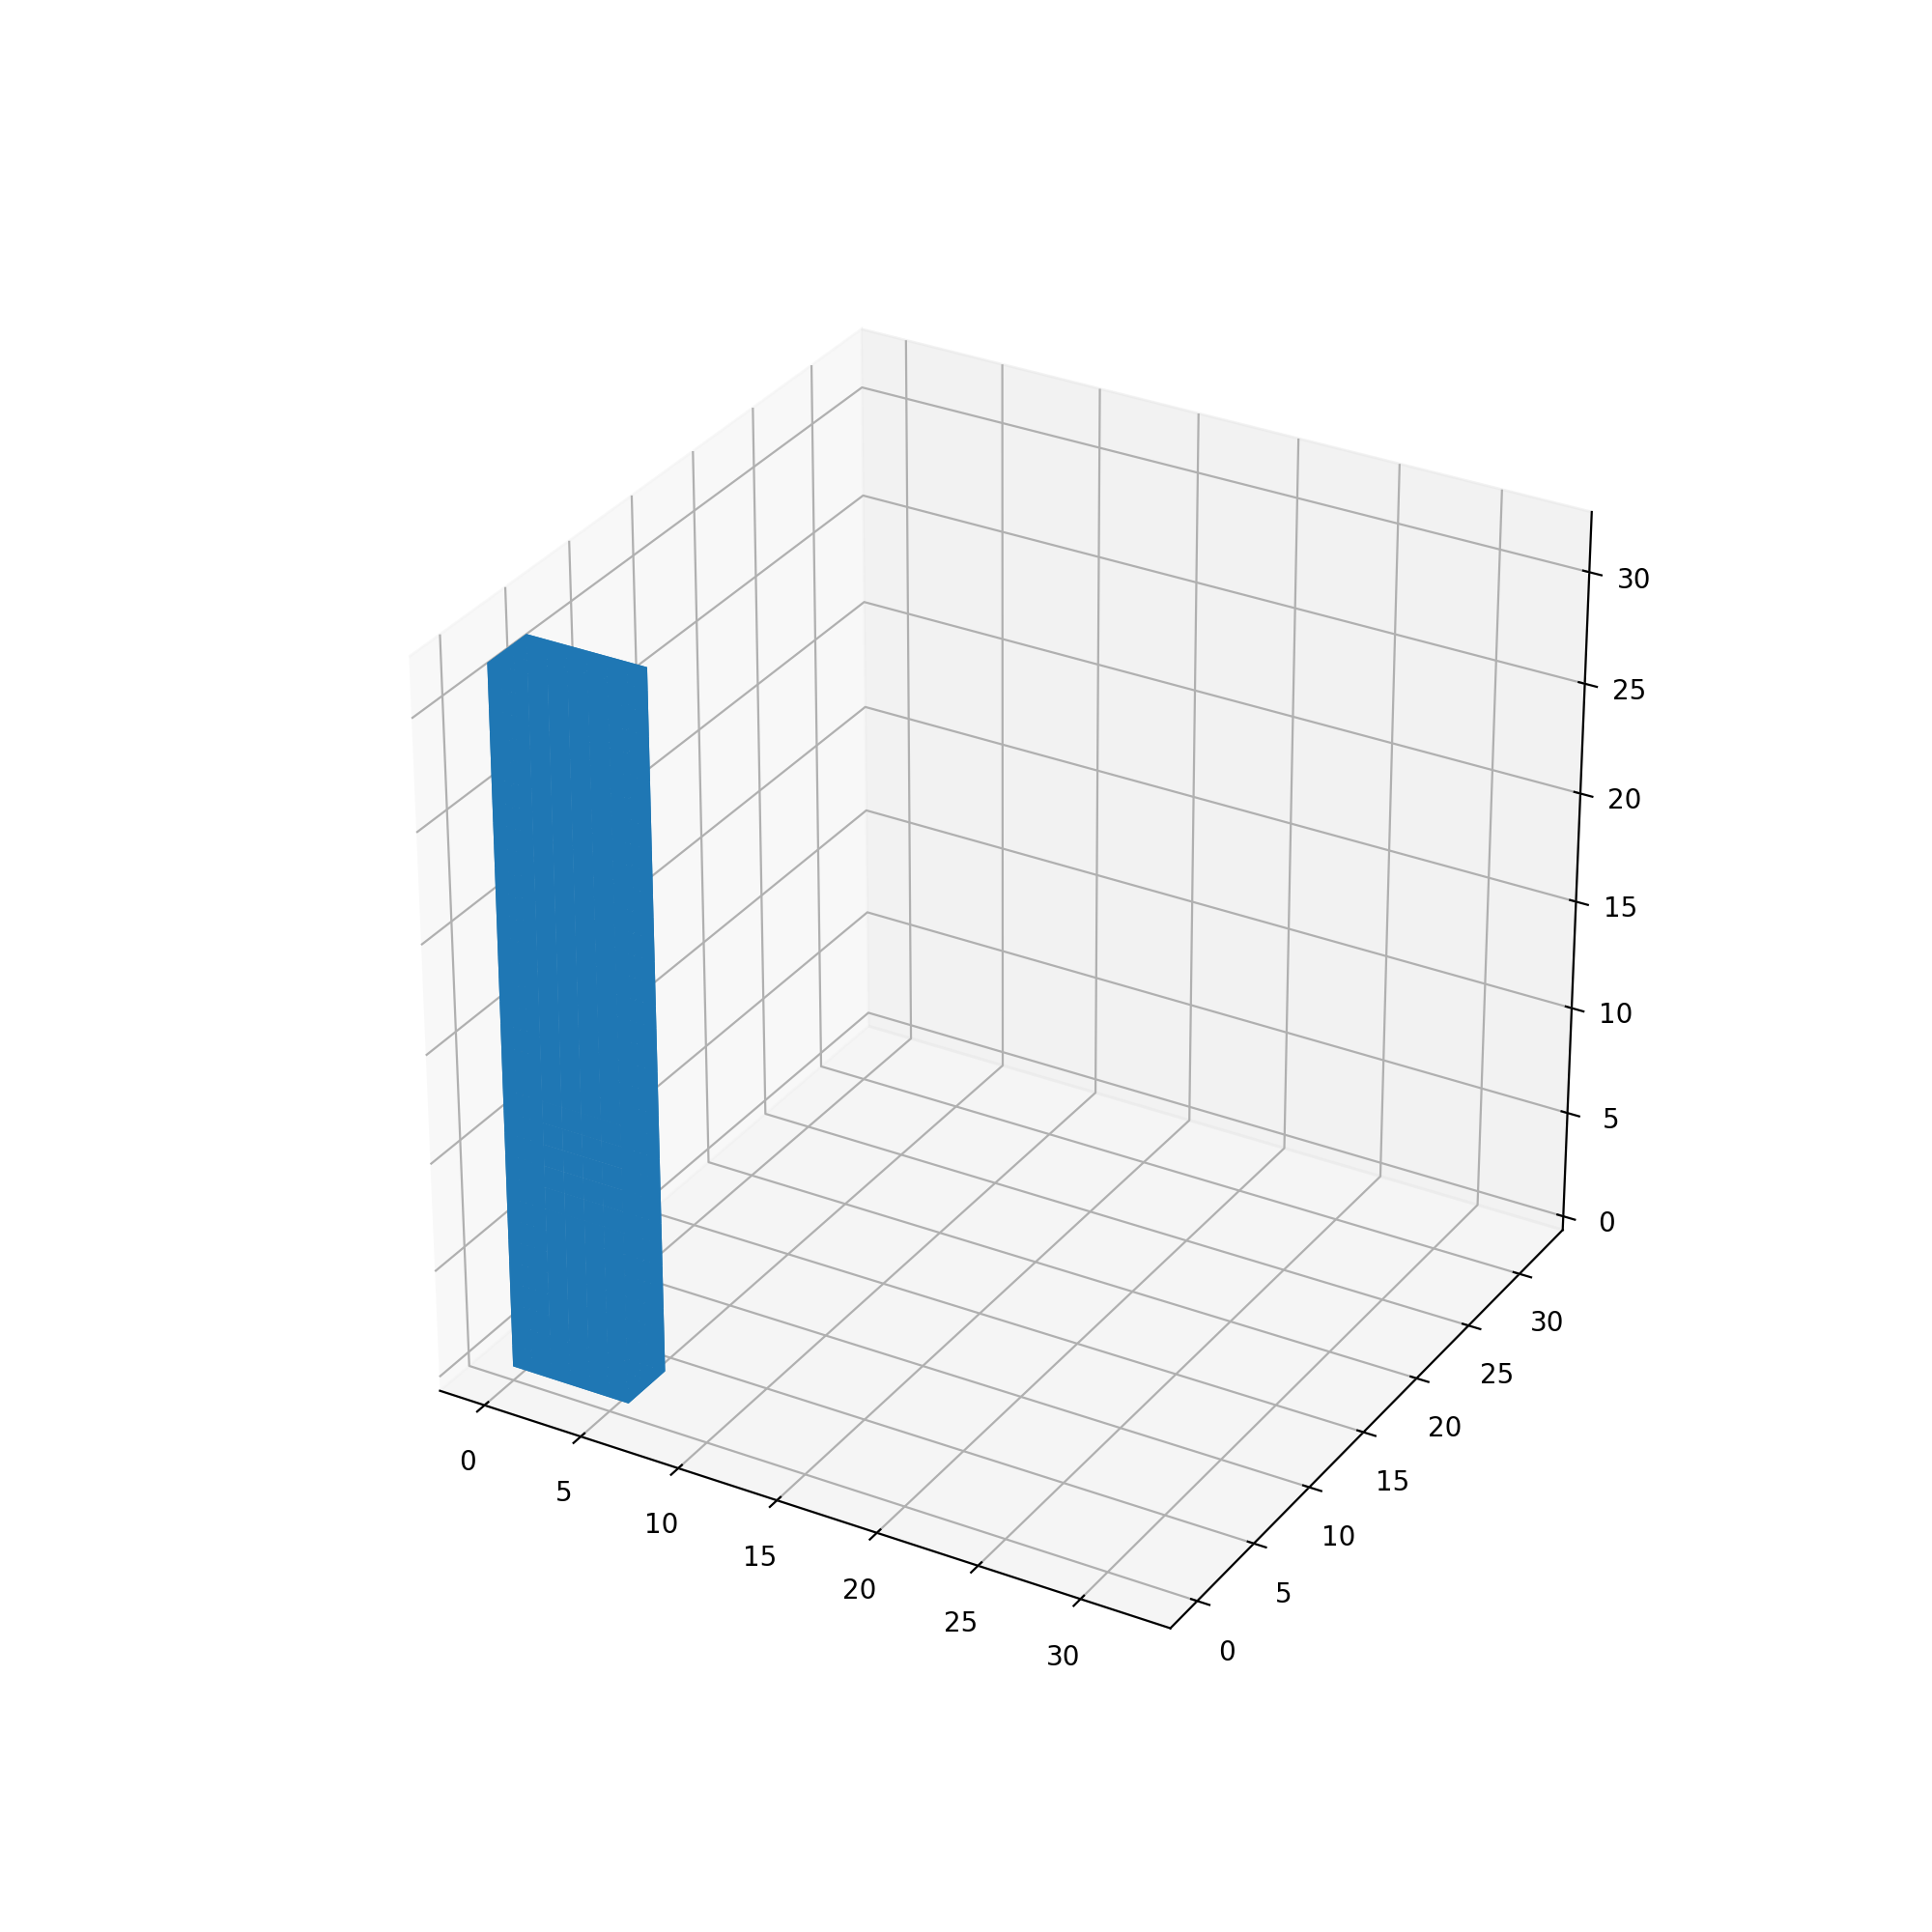

<IPython.core.display.Javascript object>


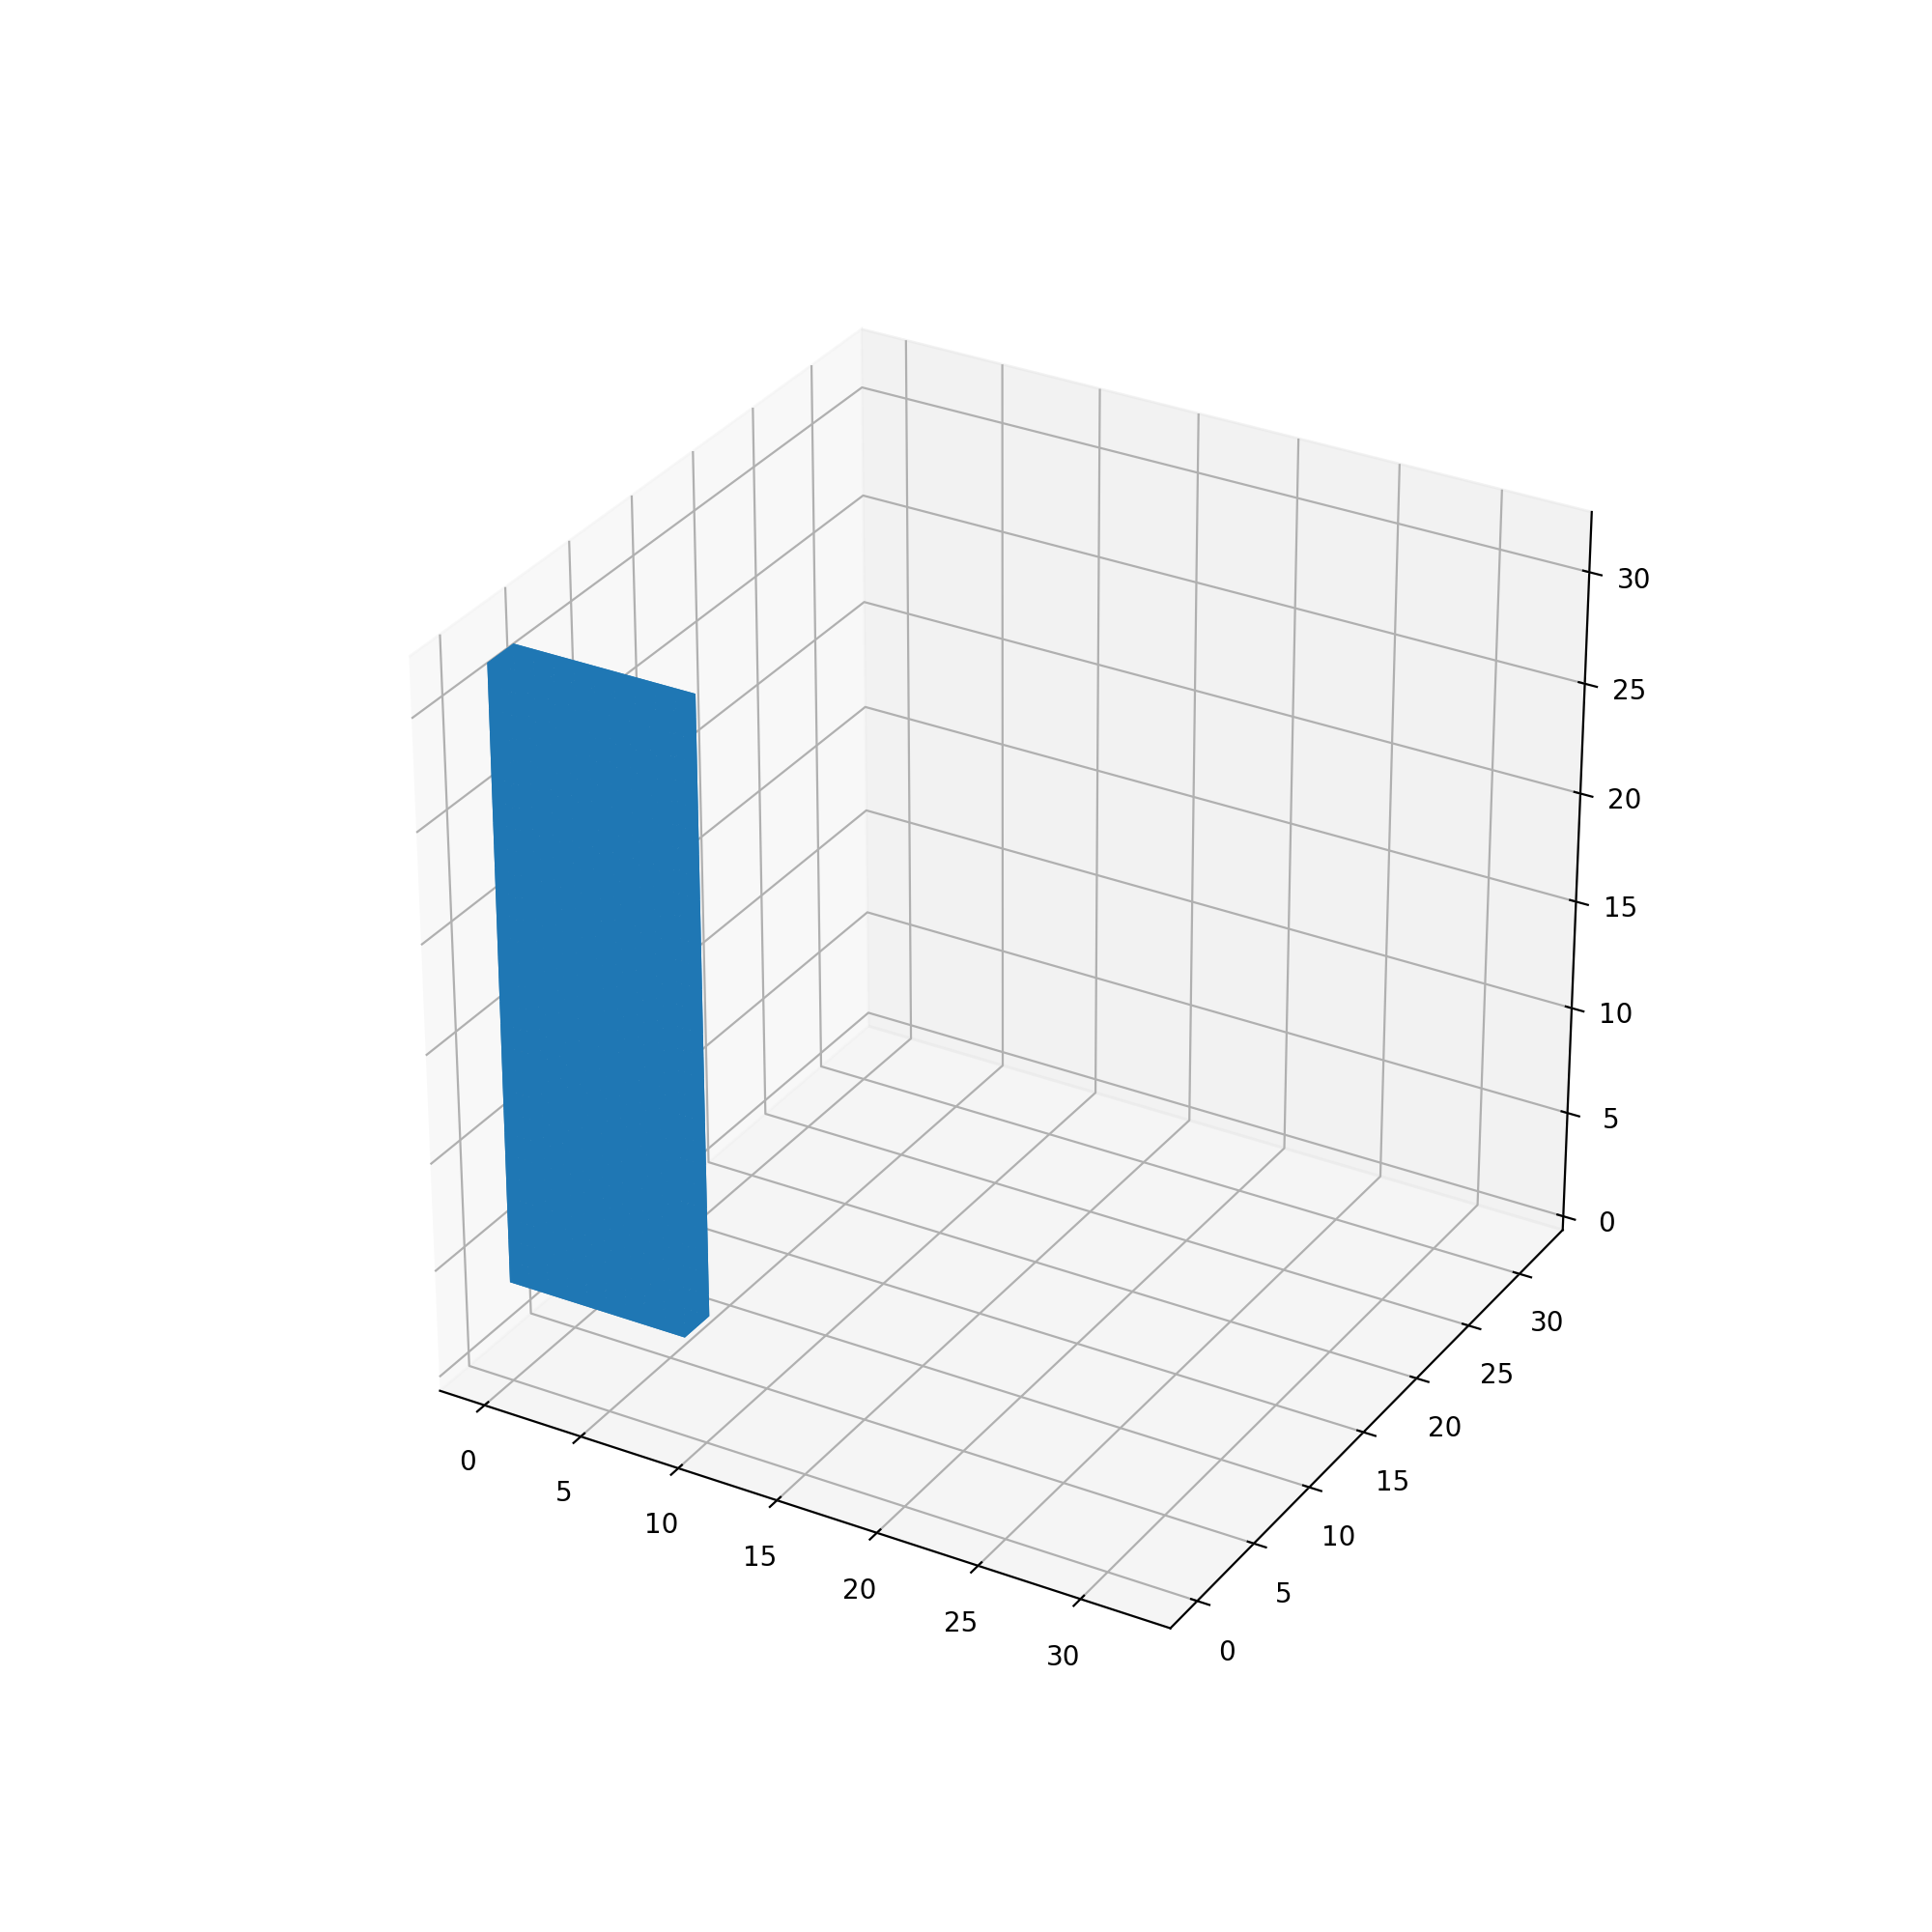

<IPython.core.display.Javascript object>


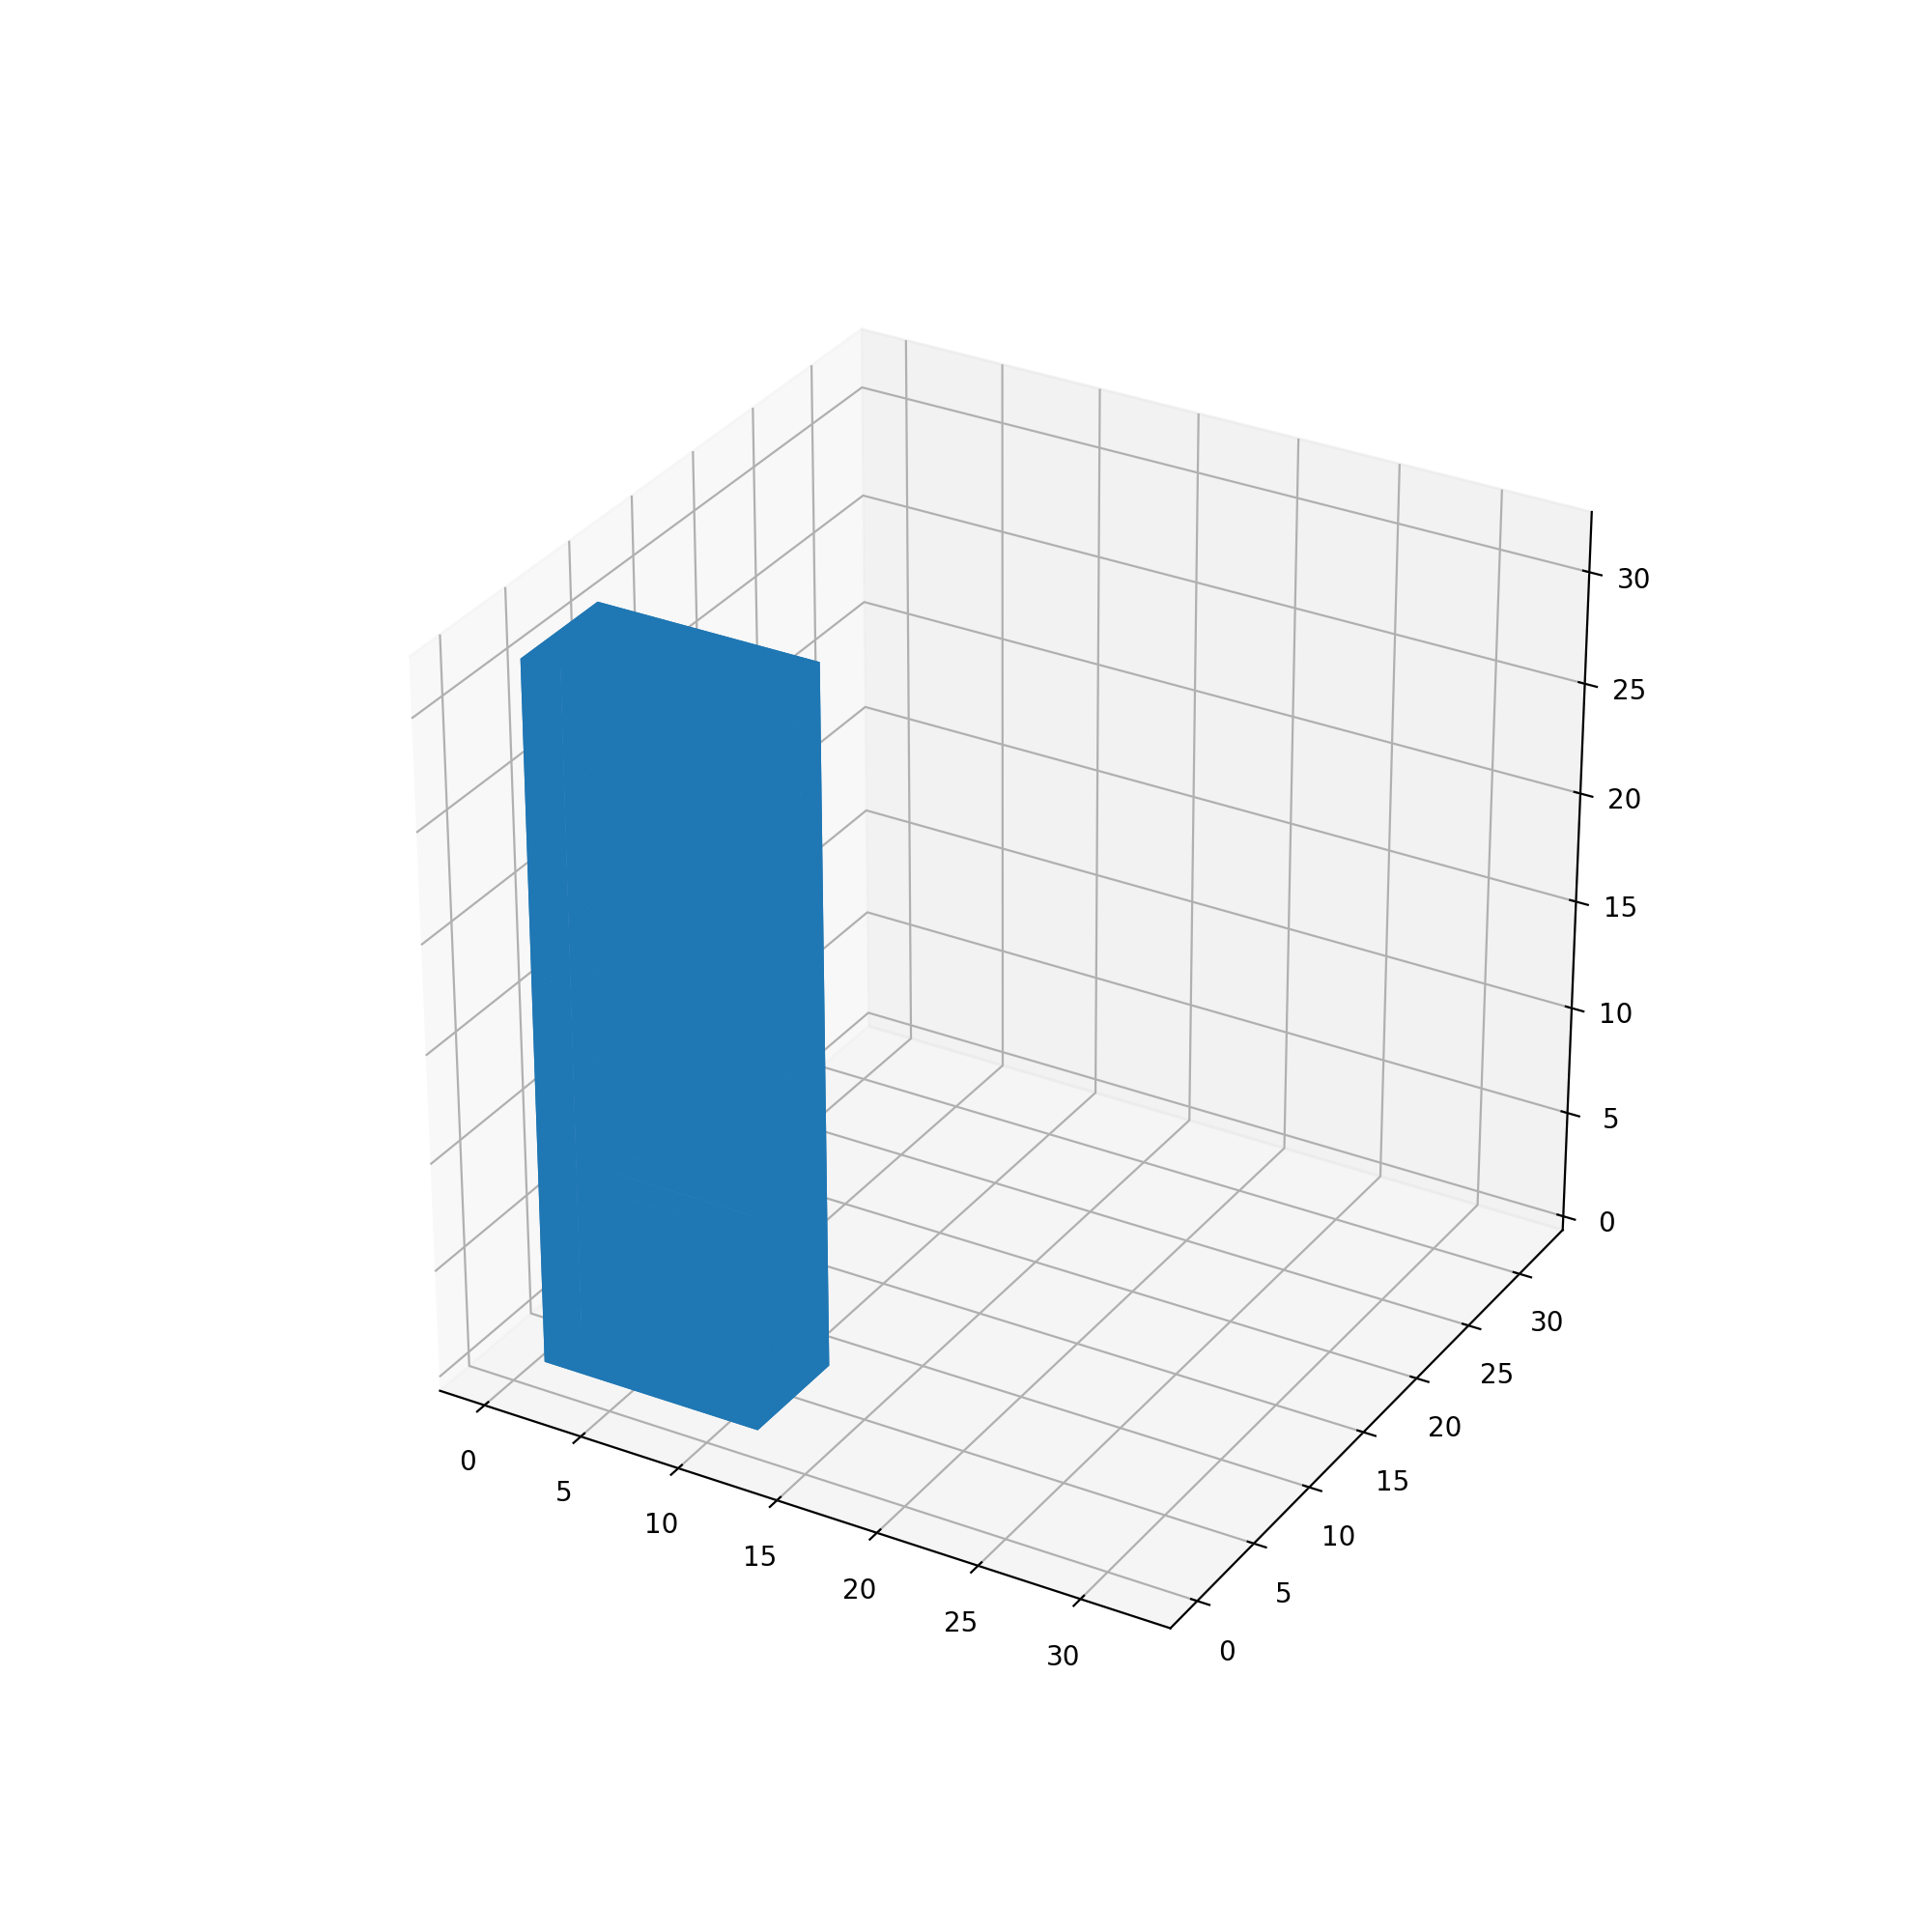

<IPython.core.display.Javascript object>


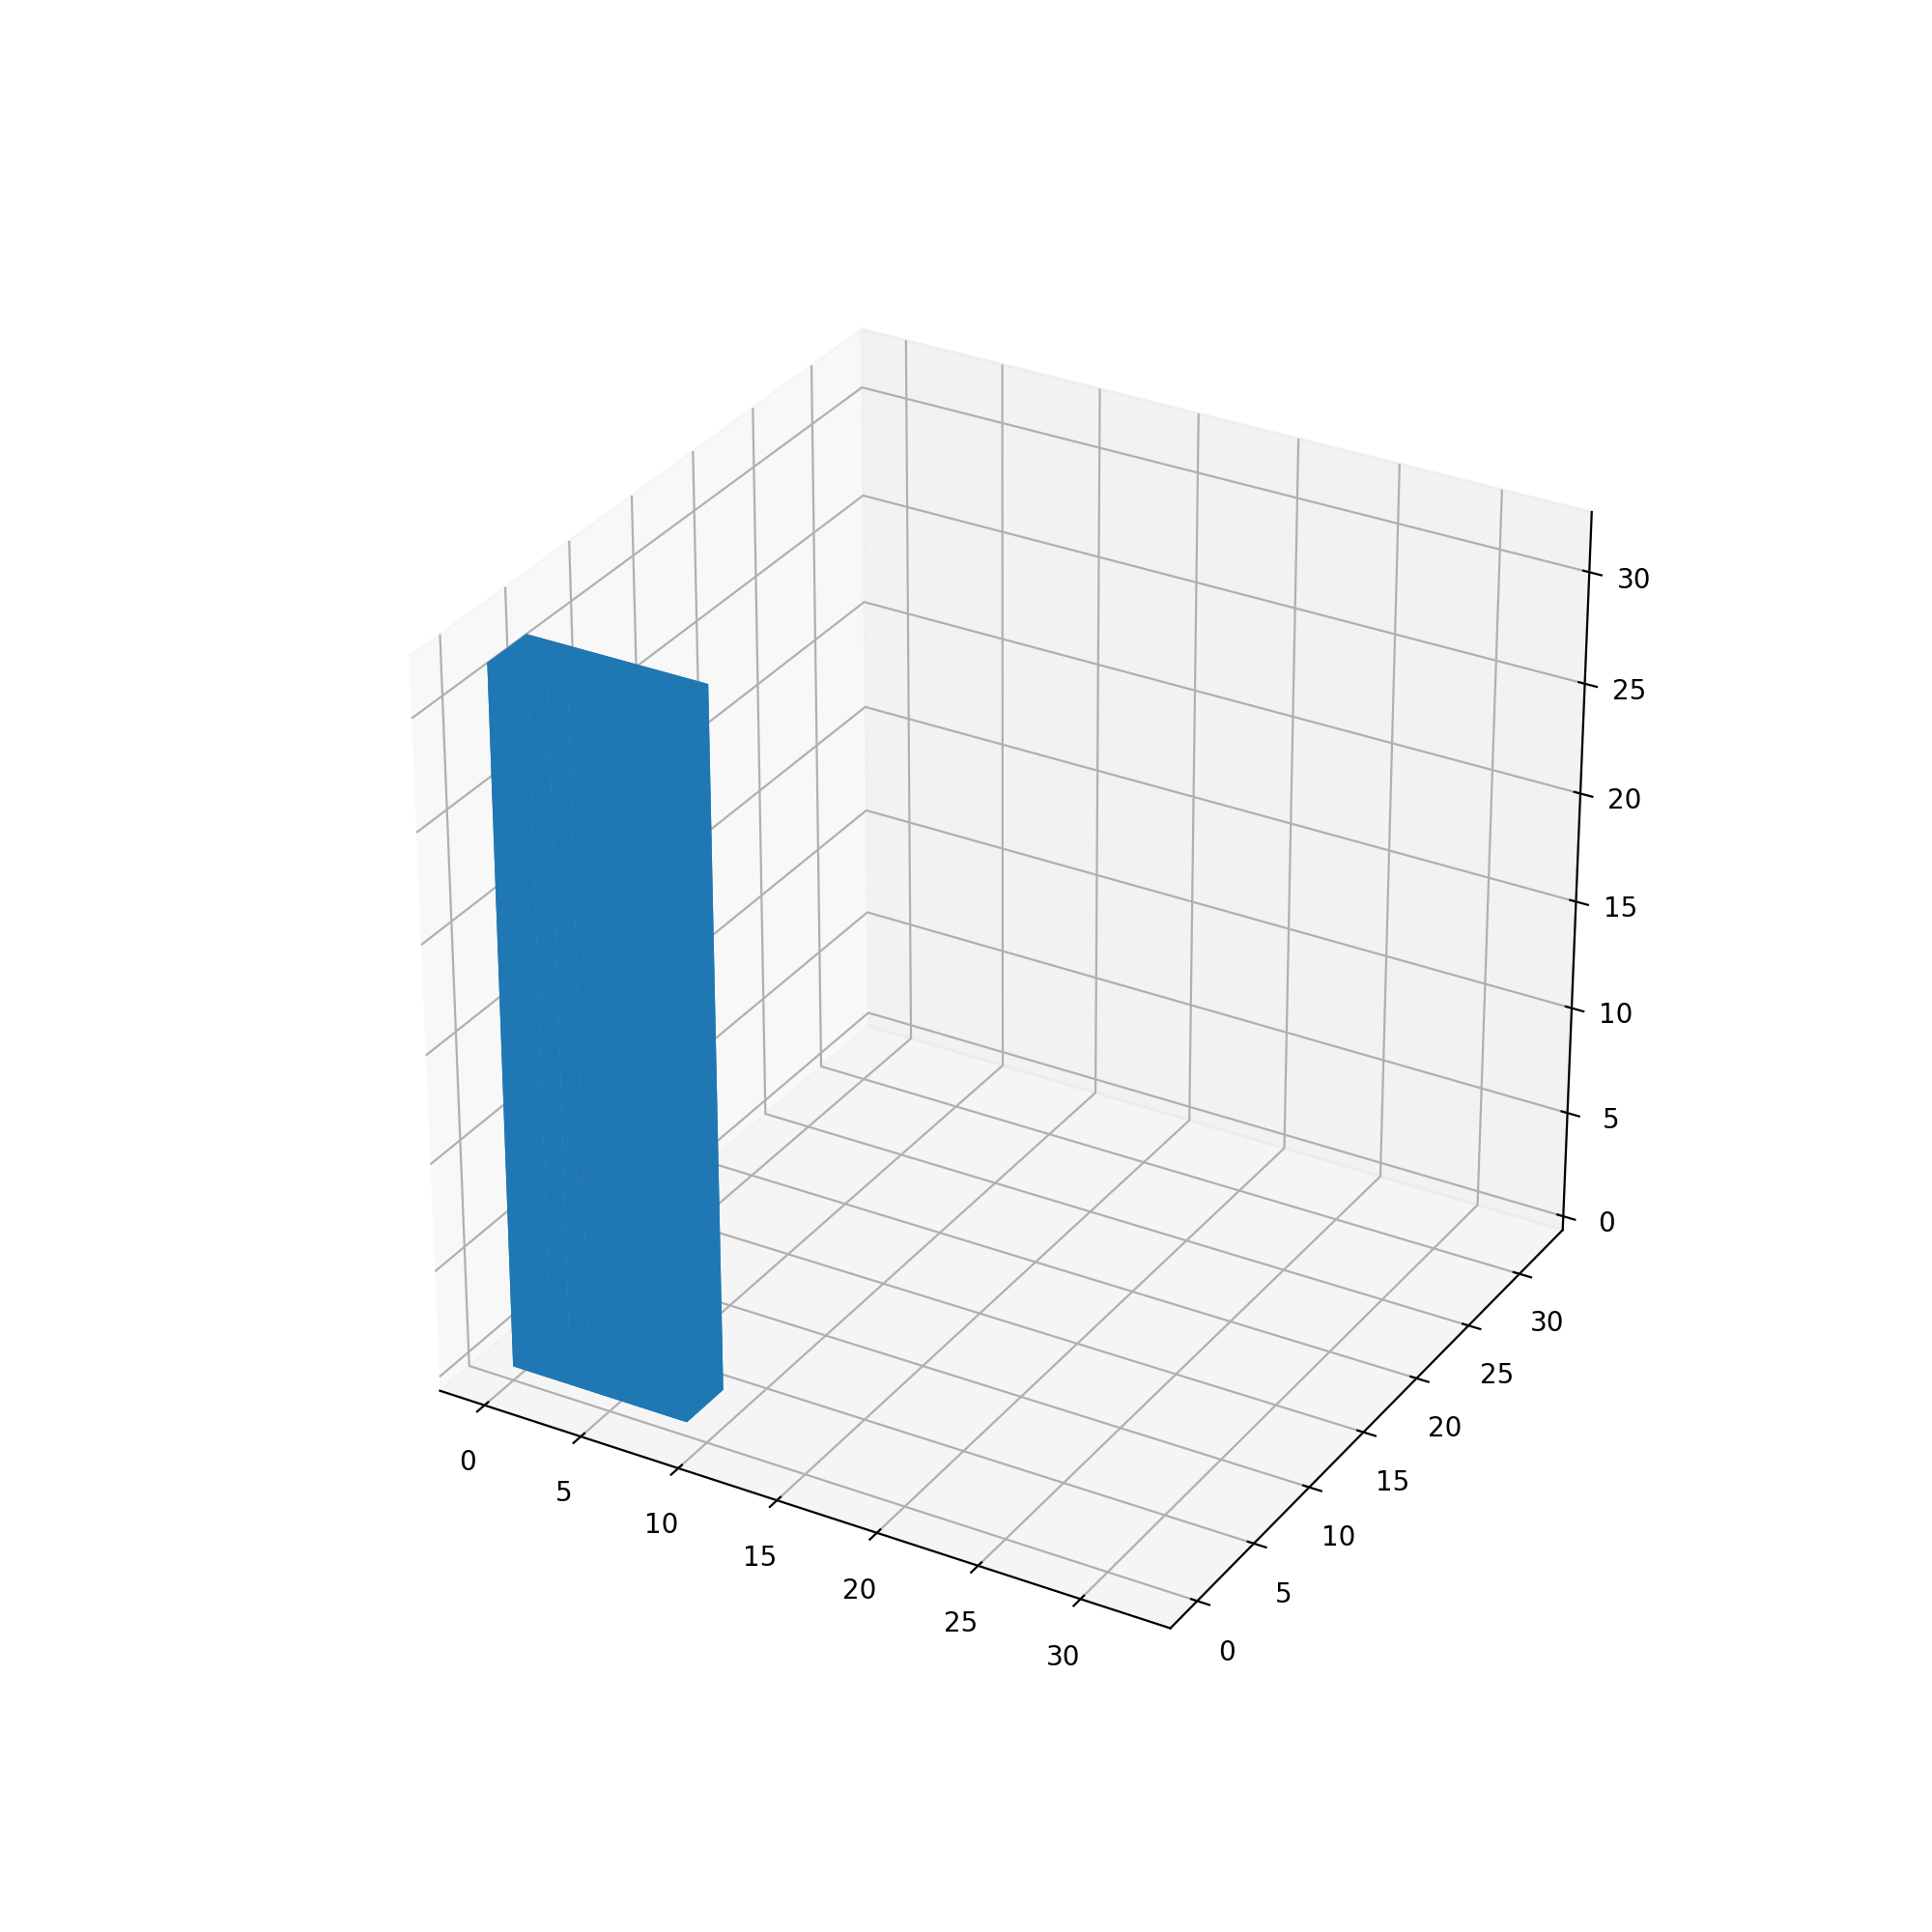

<IPython.core.display.Javascript object>


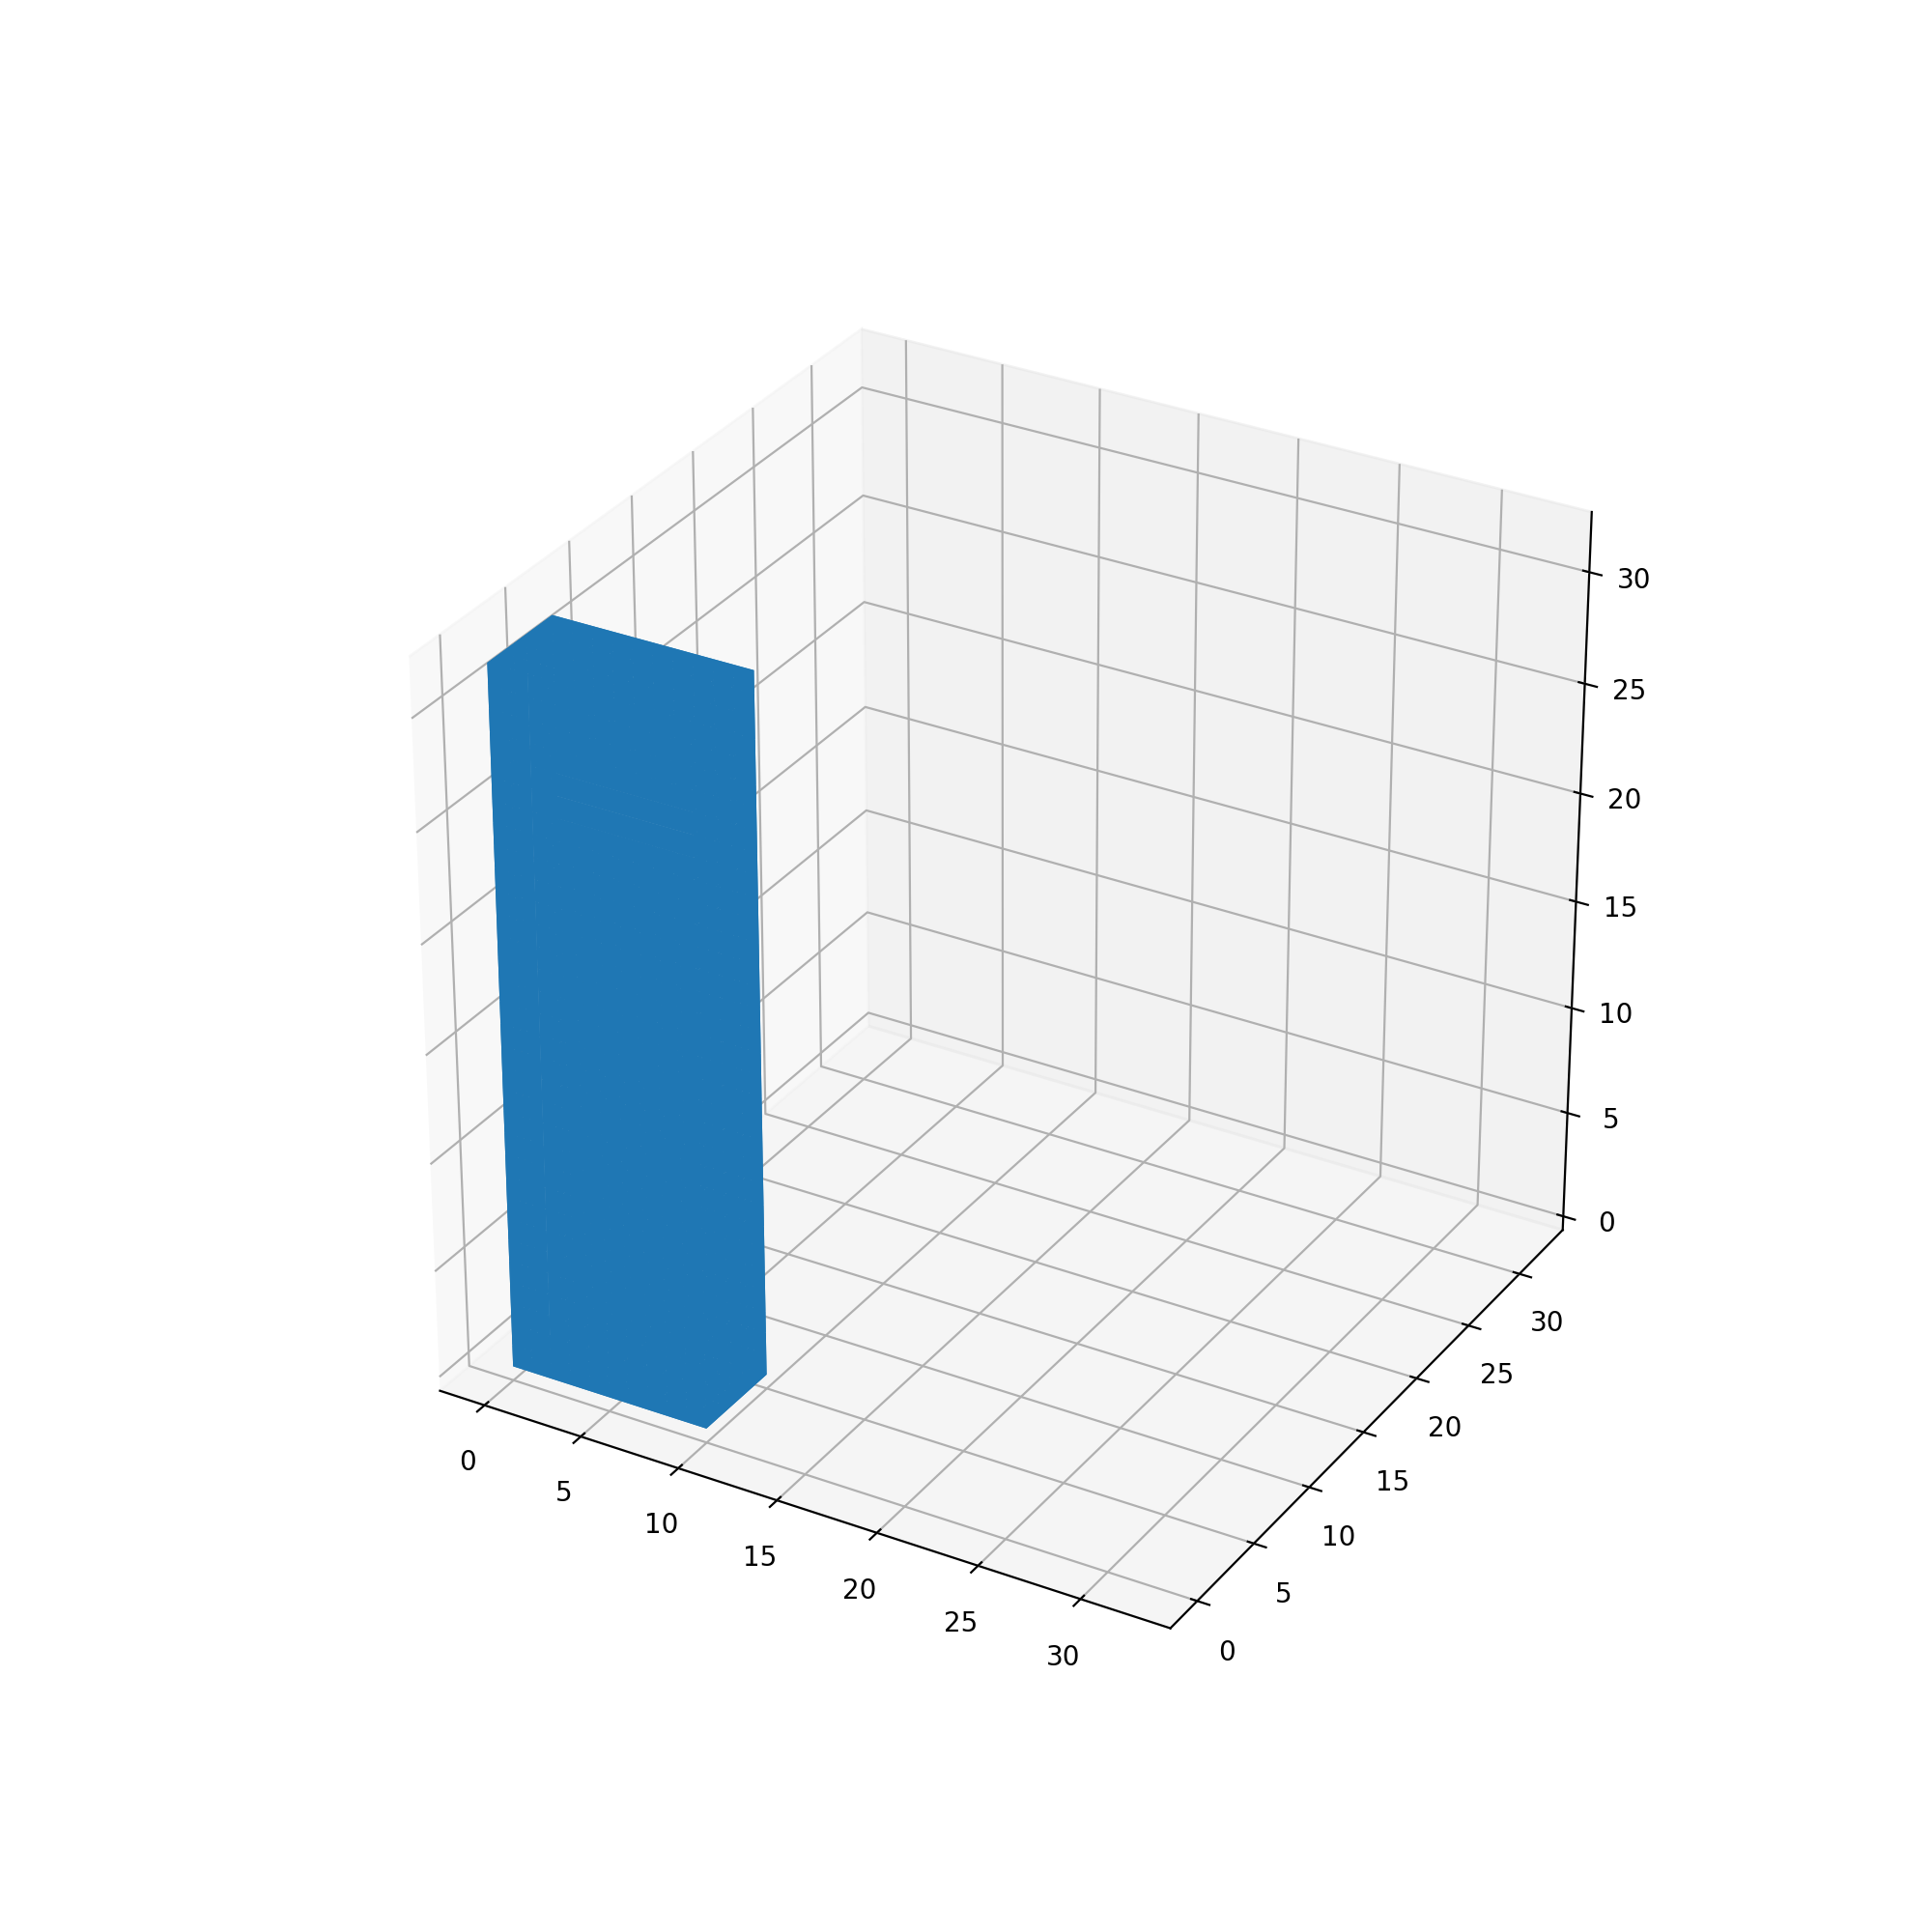

<IPython.core.display.Javascript object>


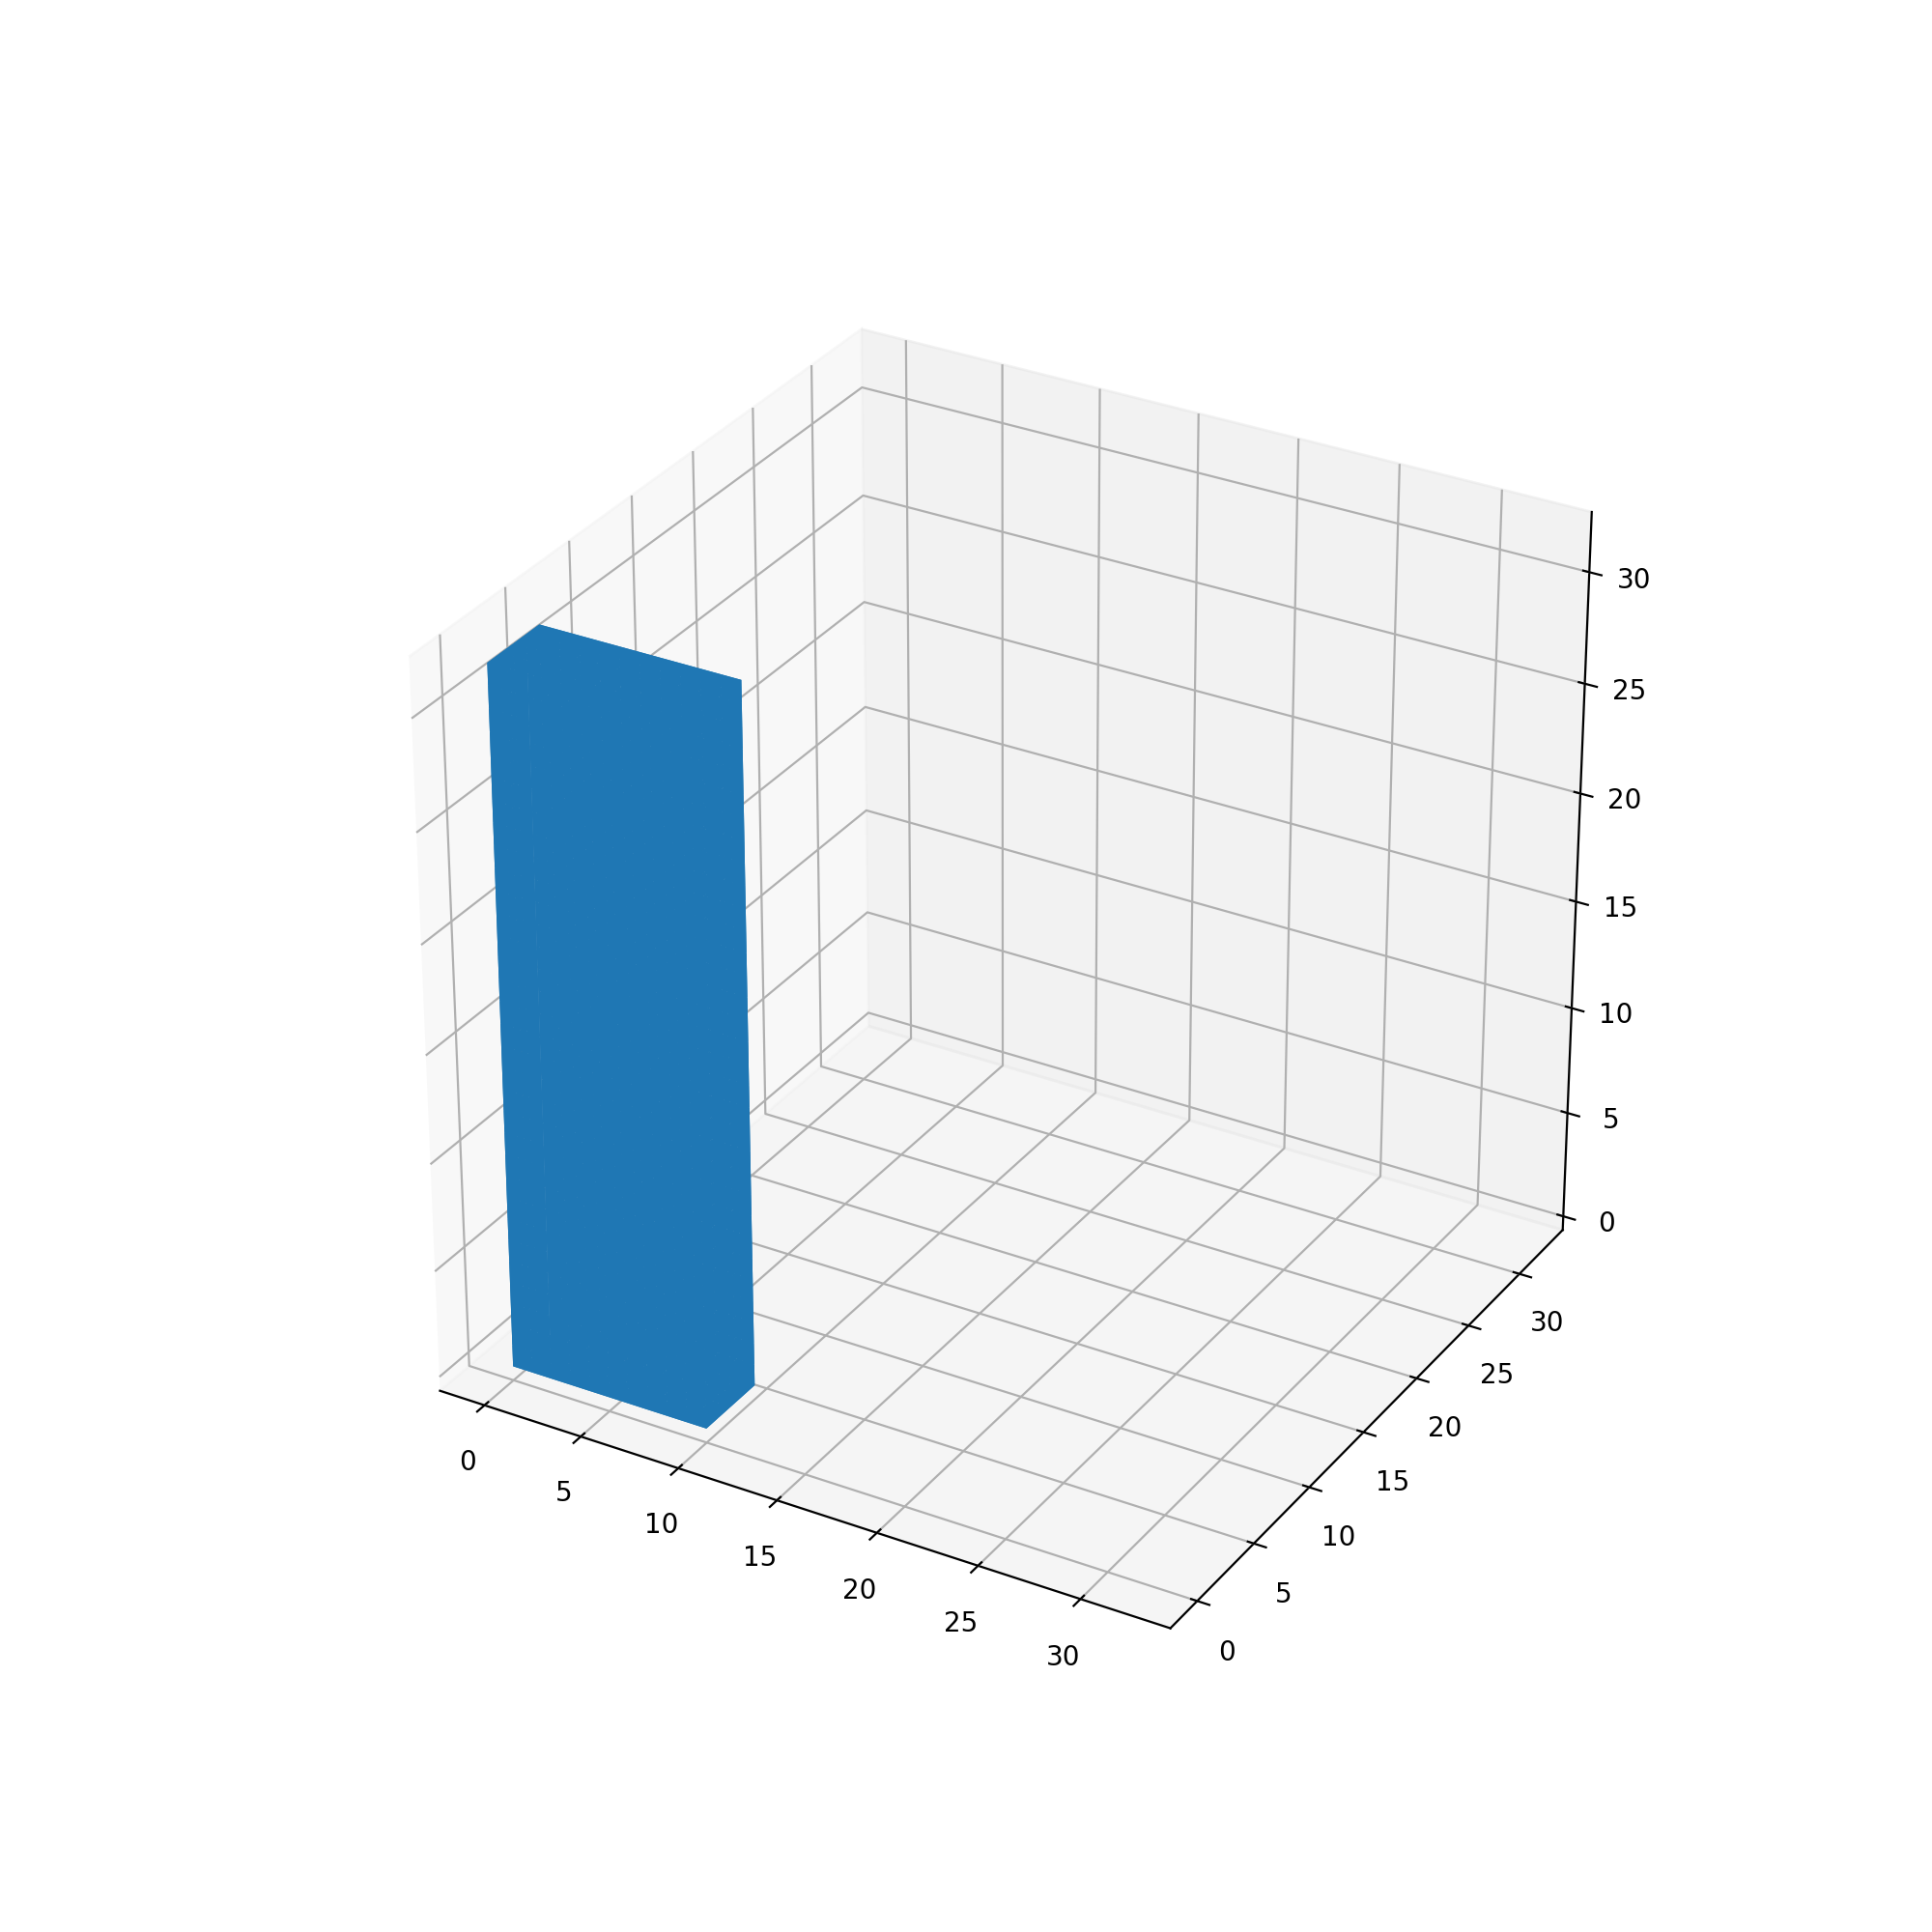

<IPython.core.display.Javascript object>


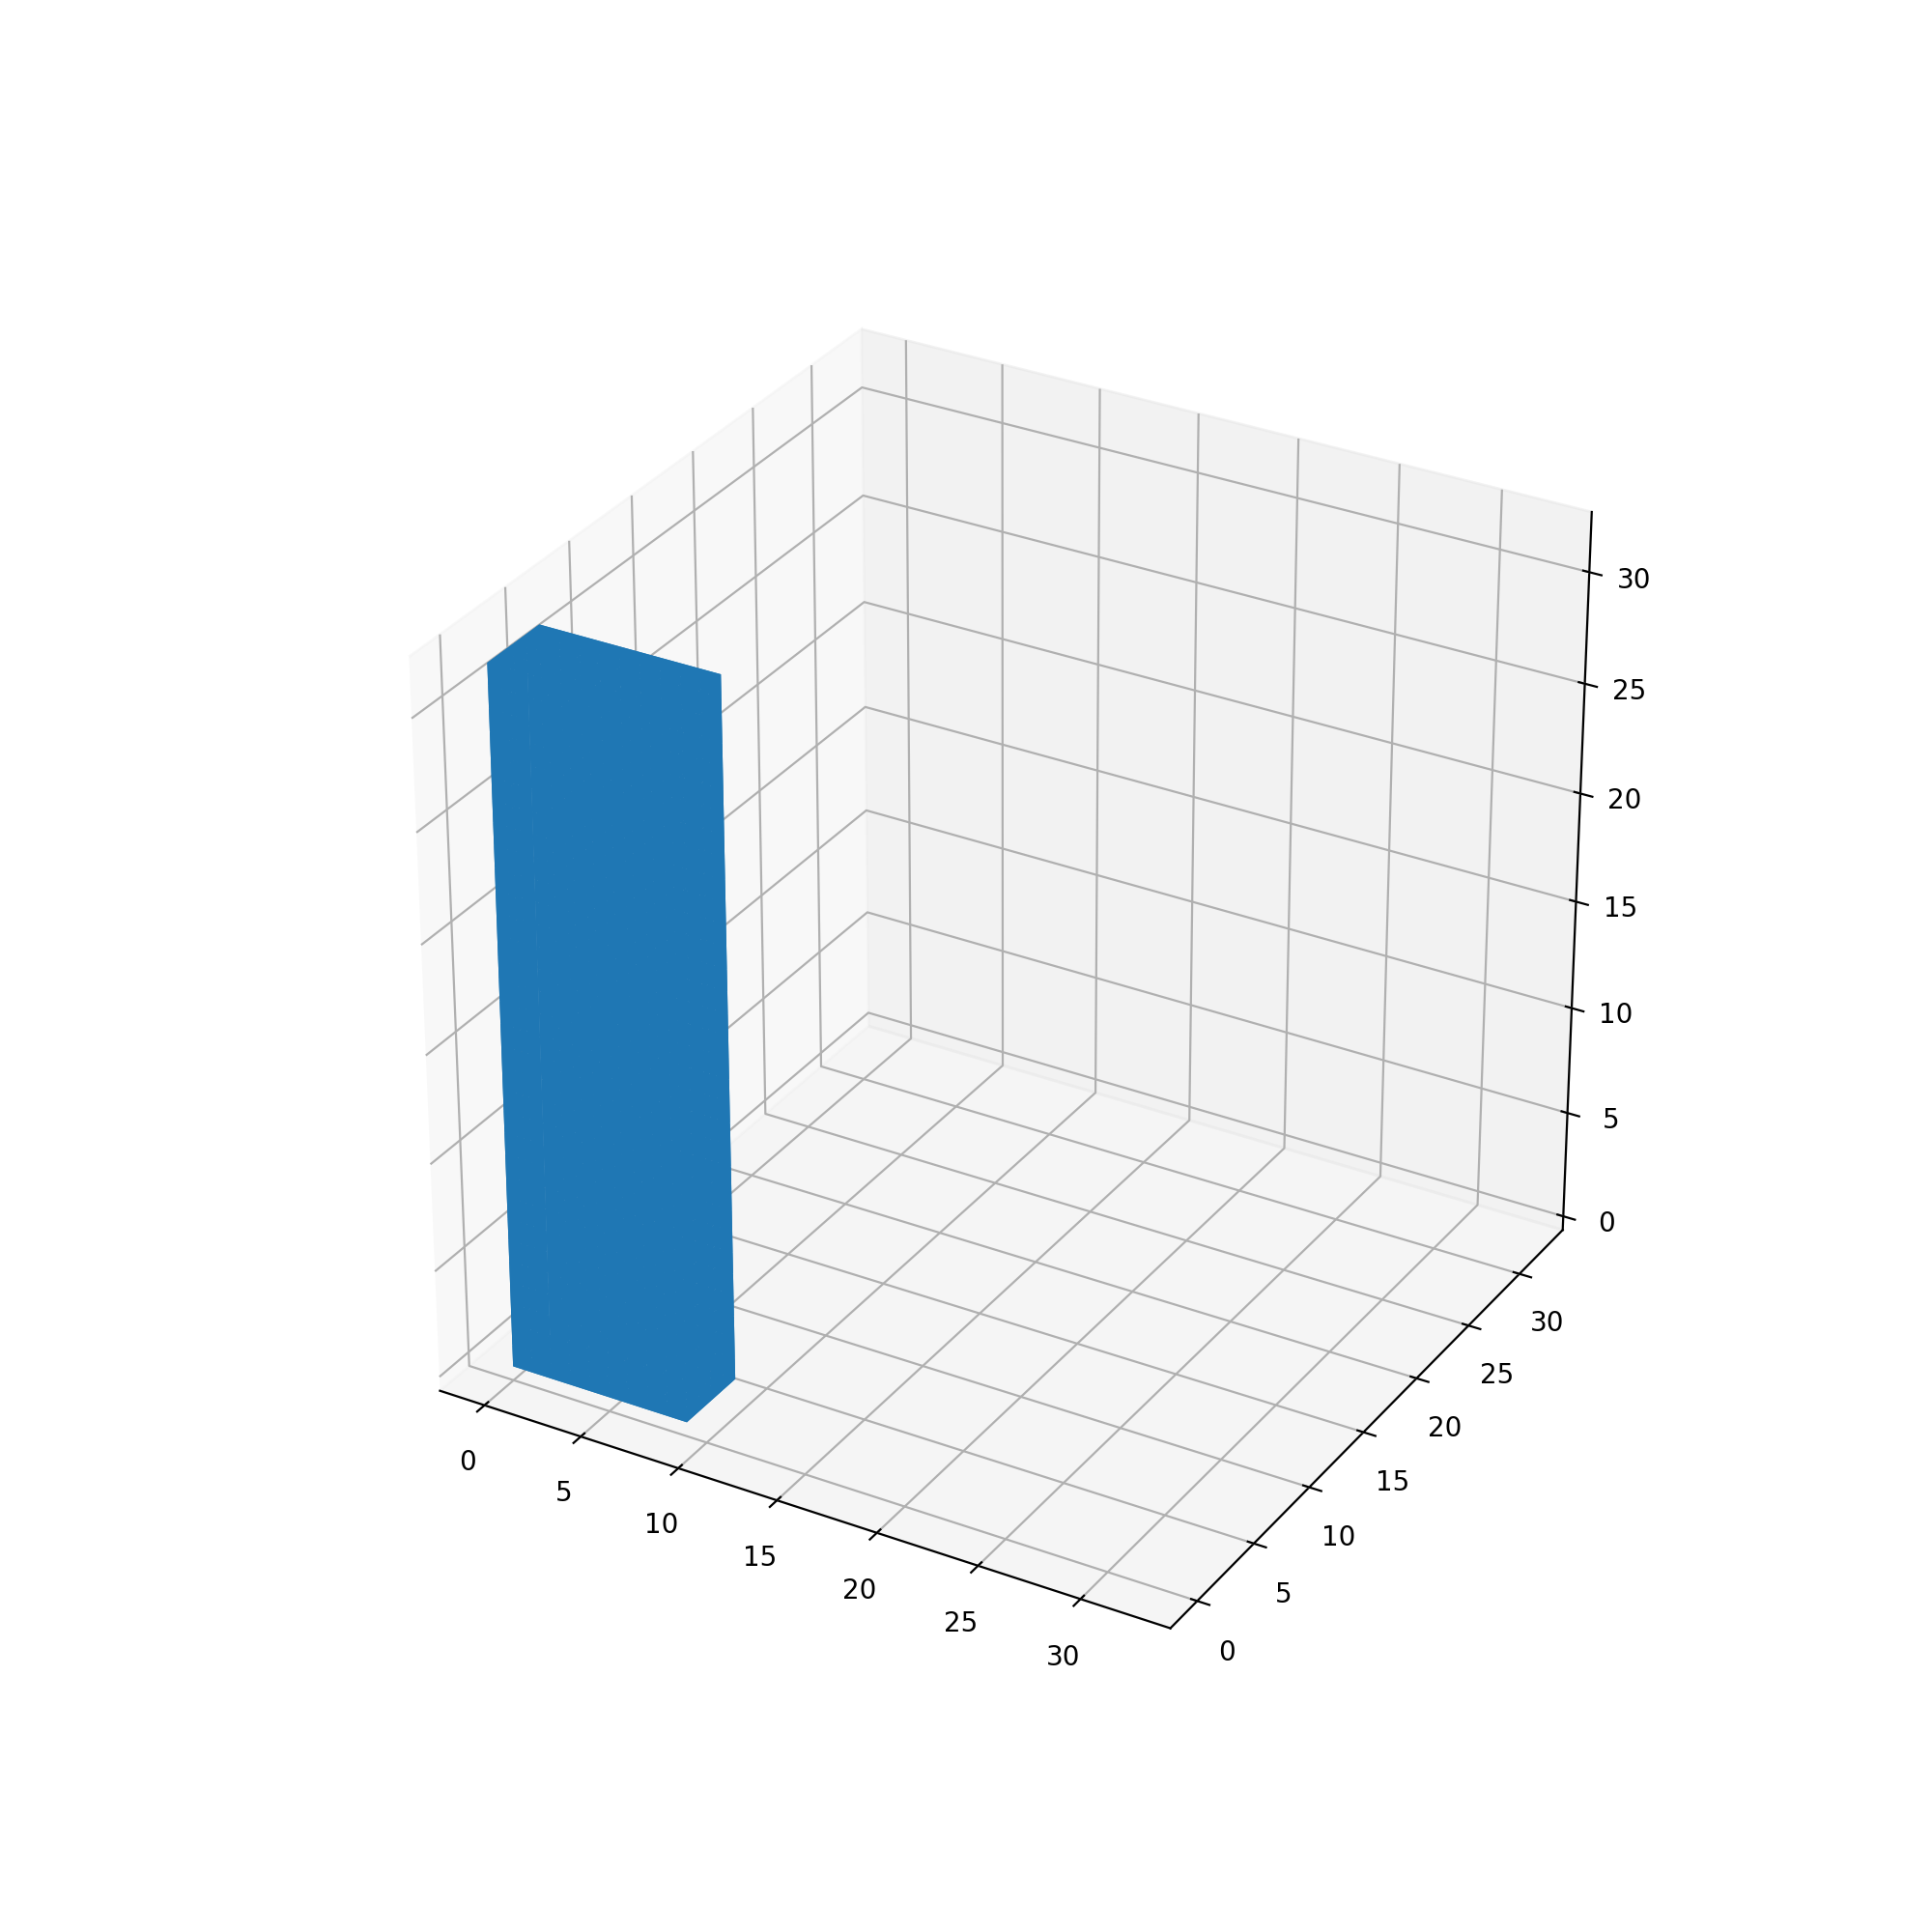

<IPython.core.display.Javascript object>


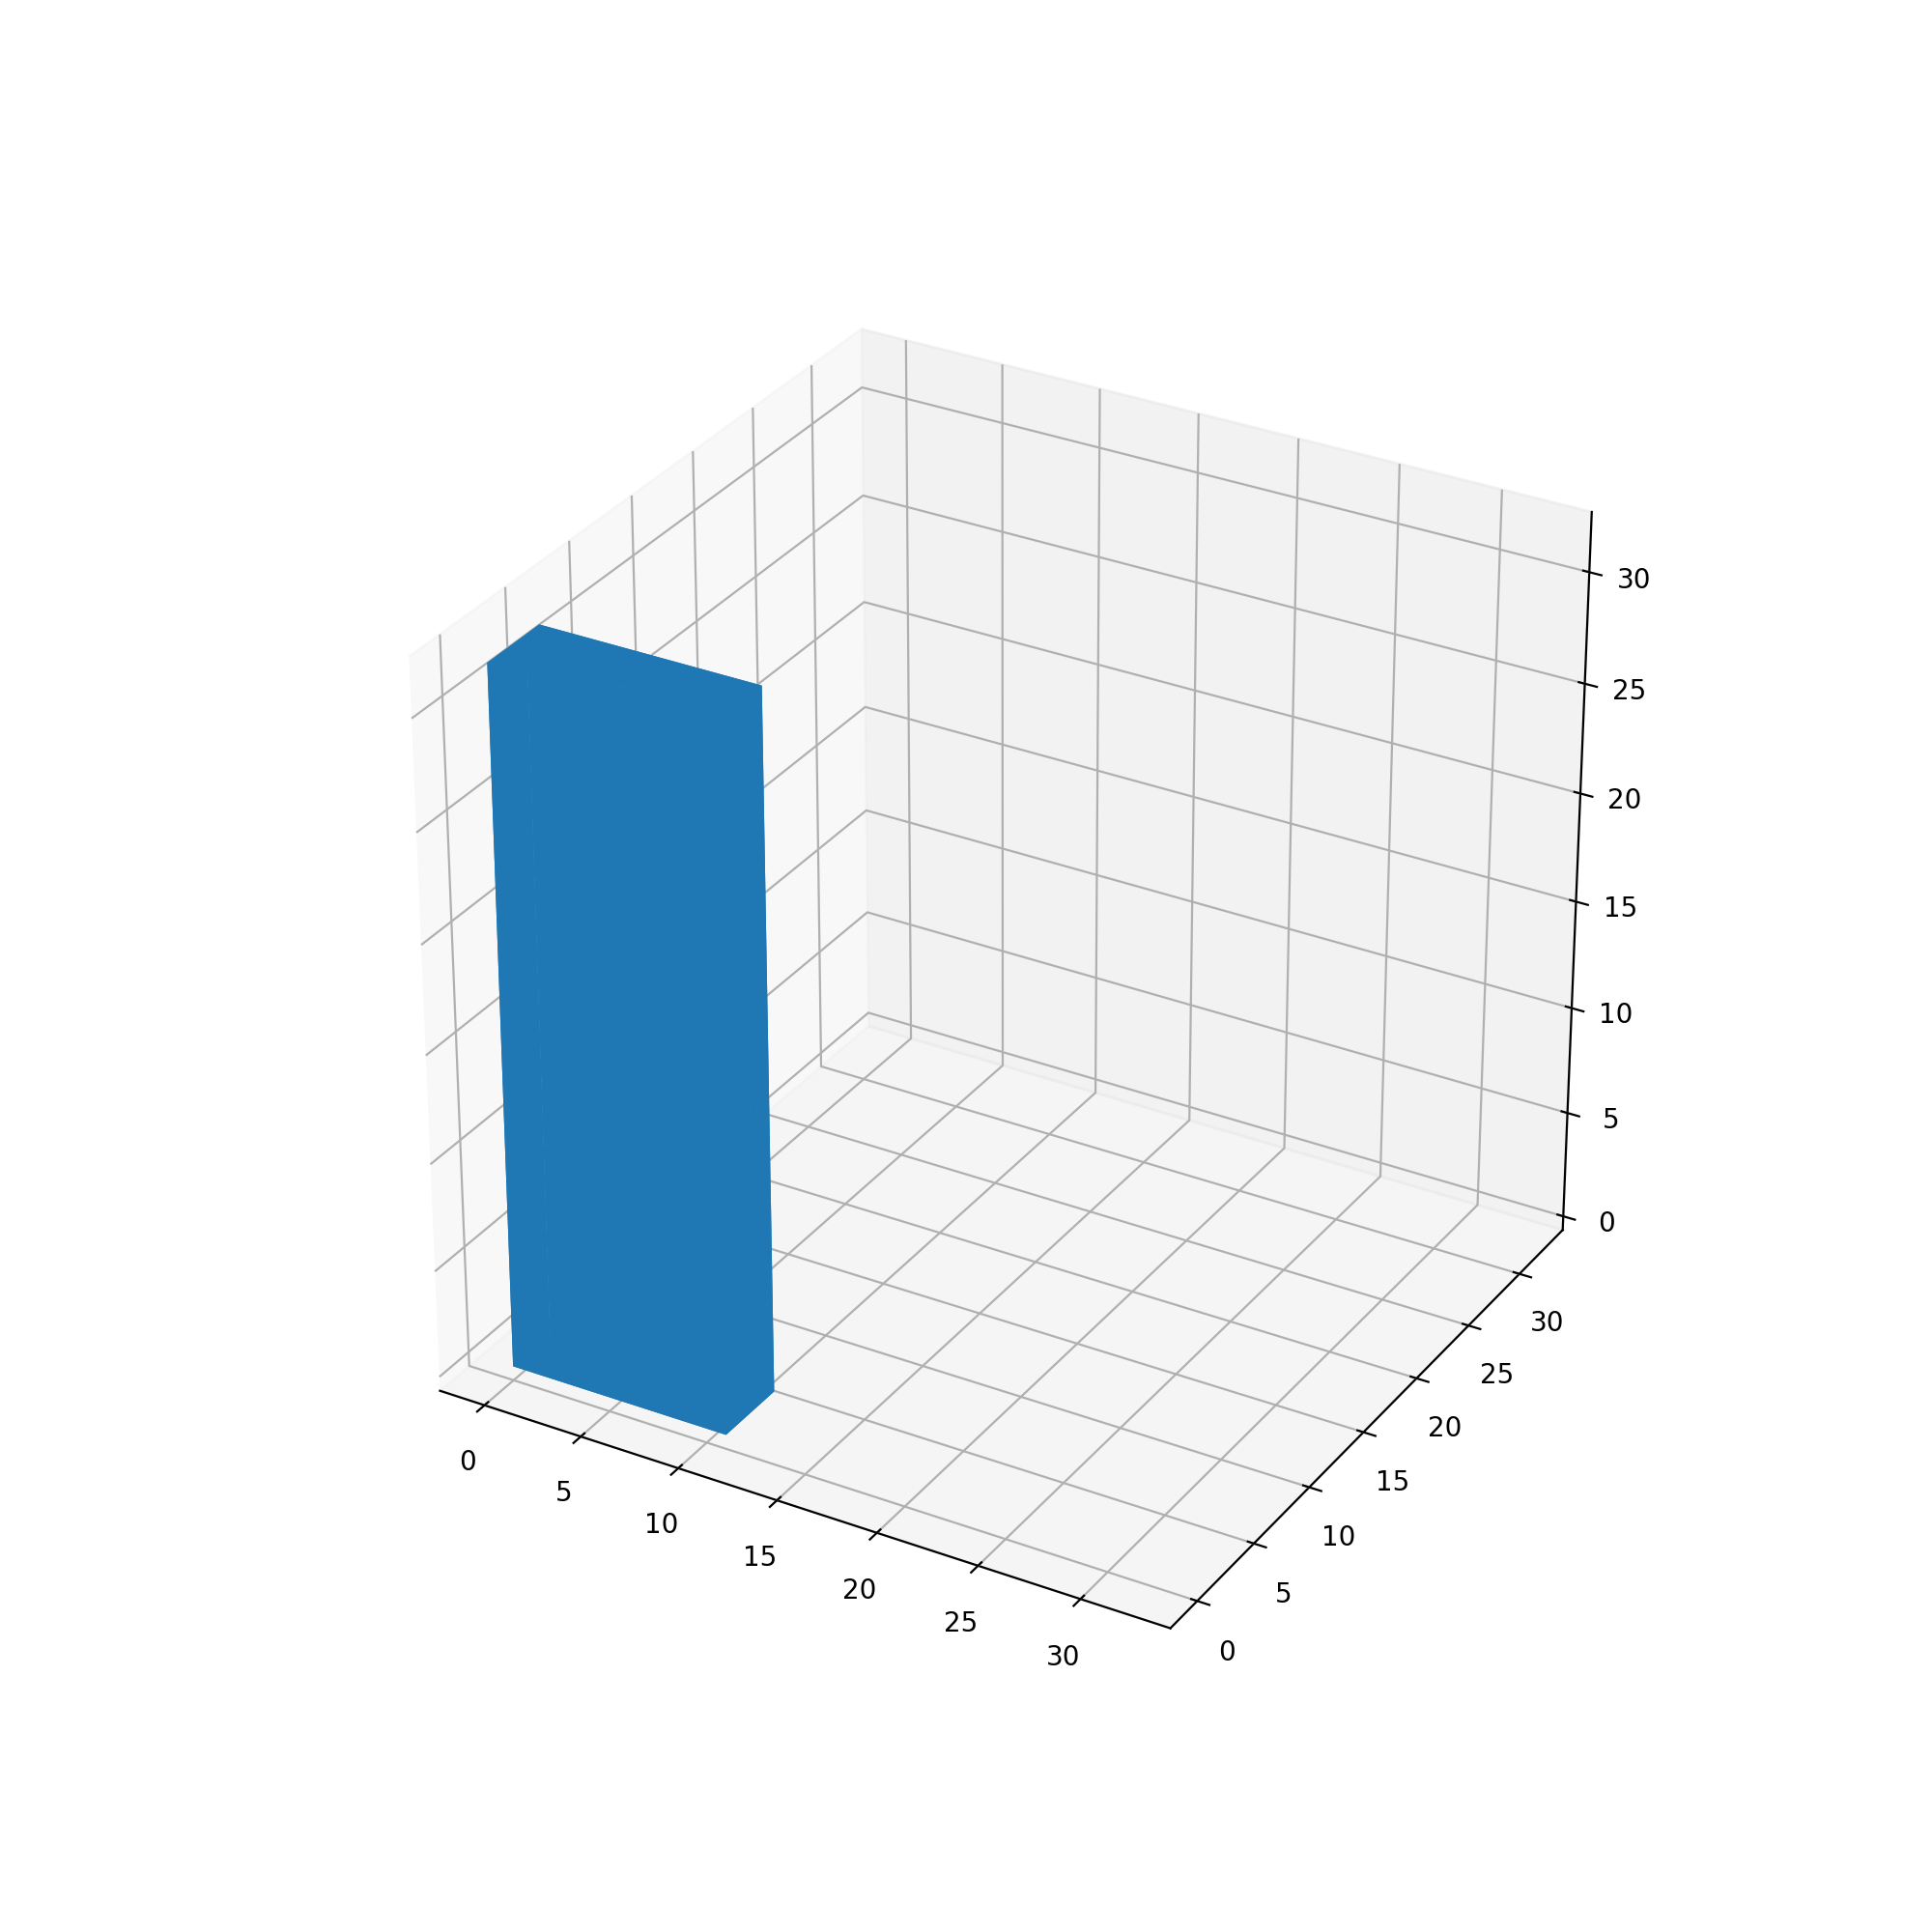

<IPython.core.display.Javascript object>


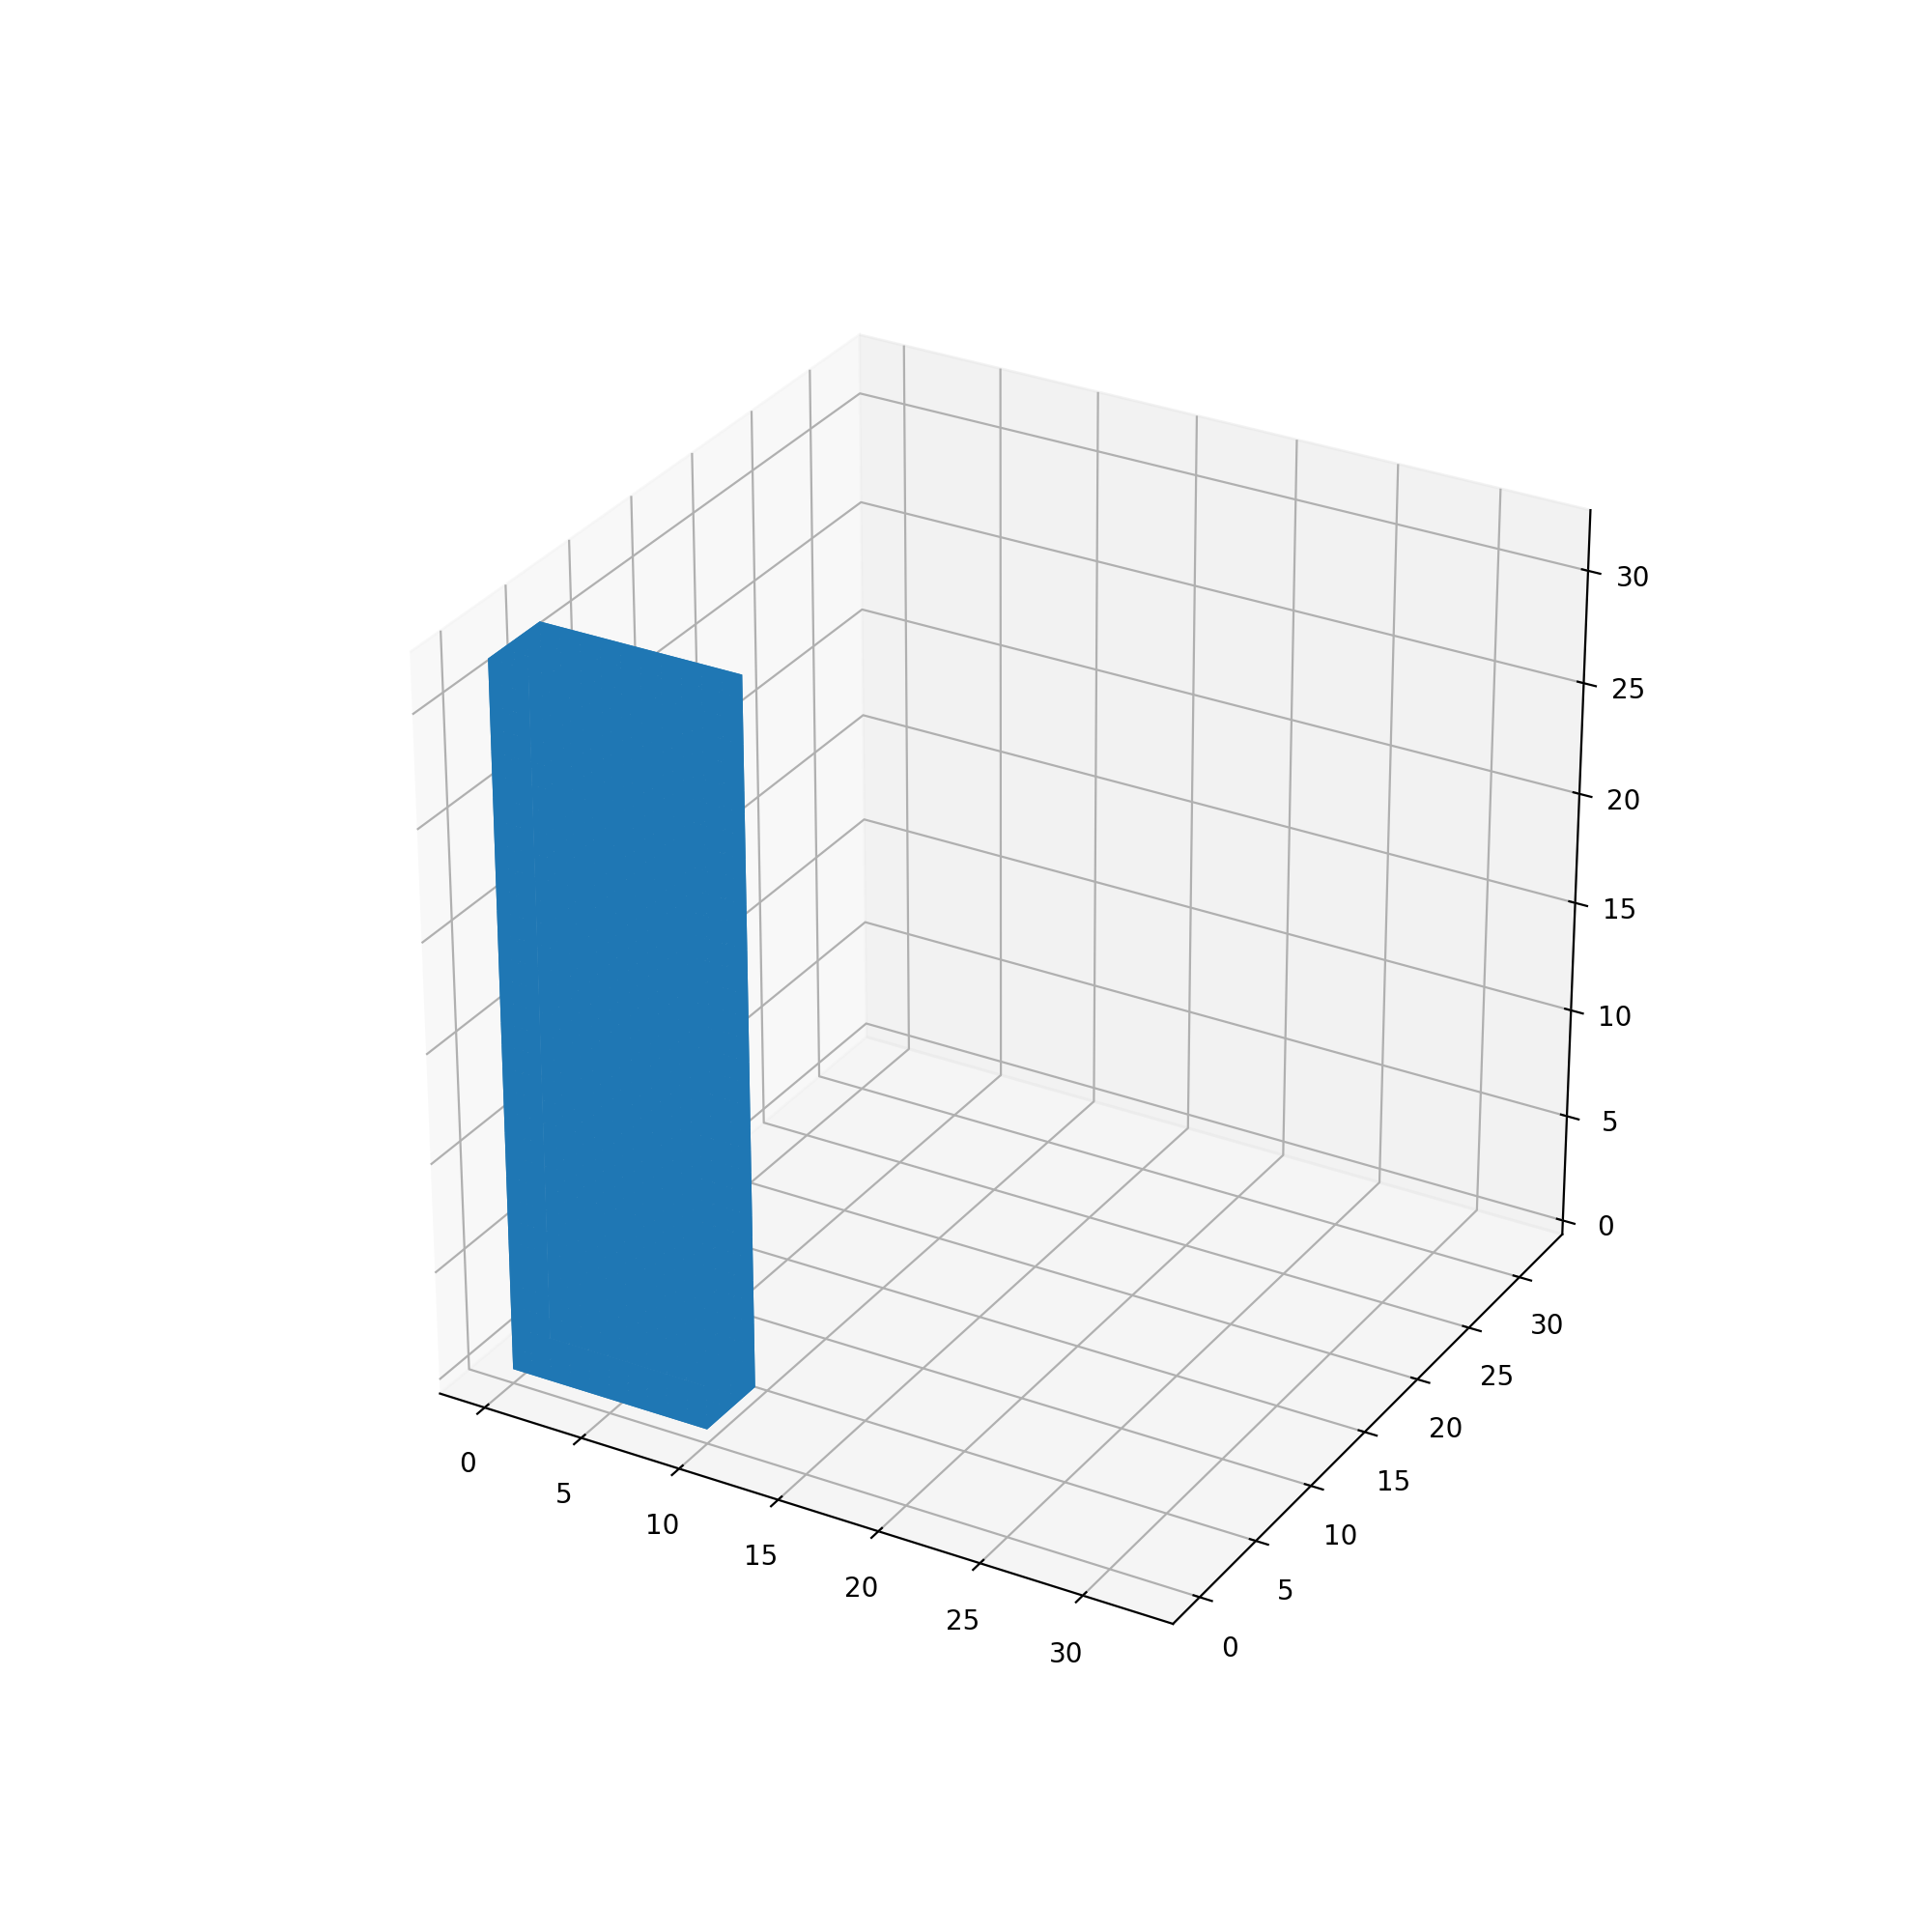

In [9]:
voxels = np.array(labels_train[0,0,:,:,:])

# and plot everything
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
#fig.savefig('VoxelizedFinal.png')
fig.show()

<IPython.core.display.Javascript object>


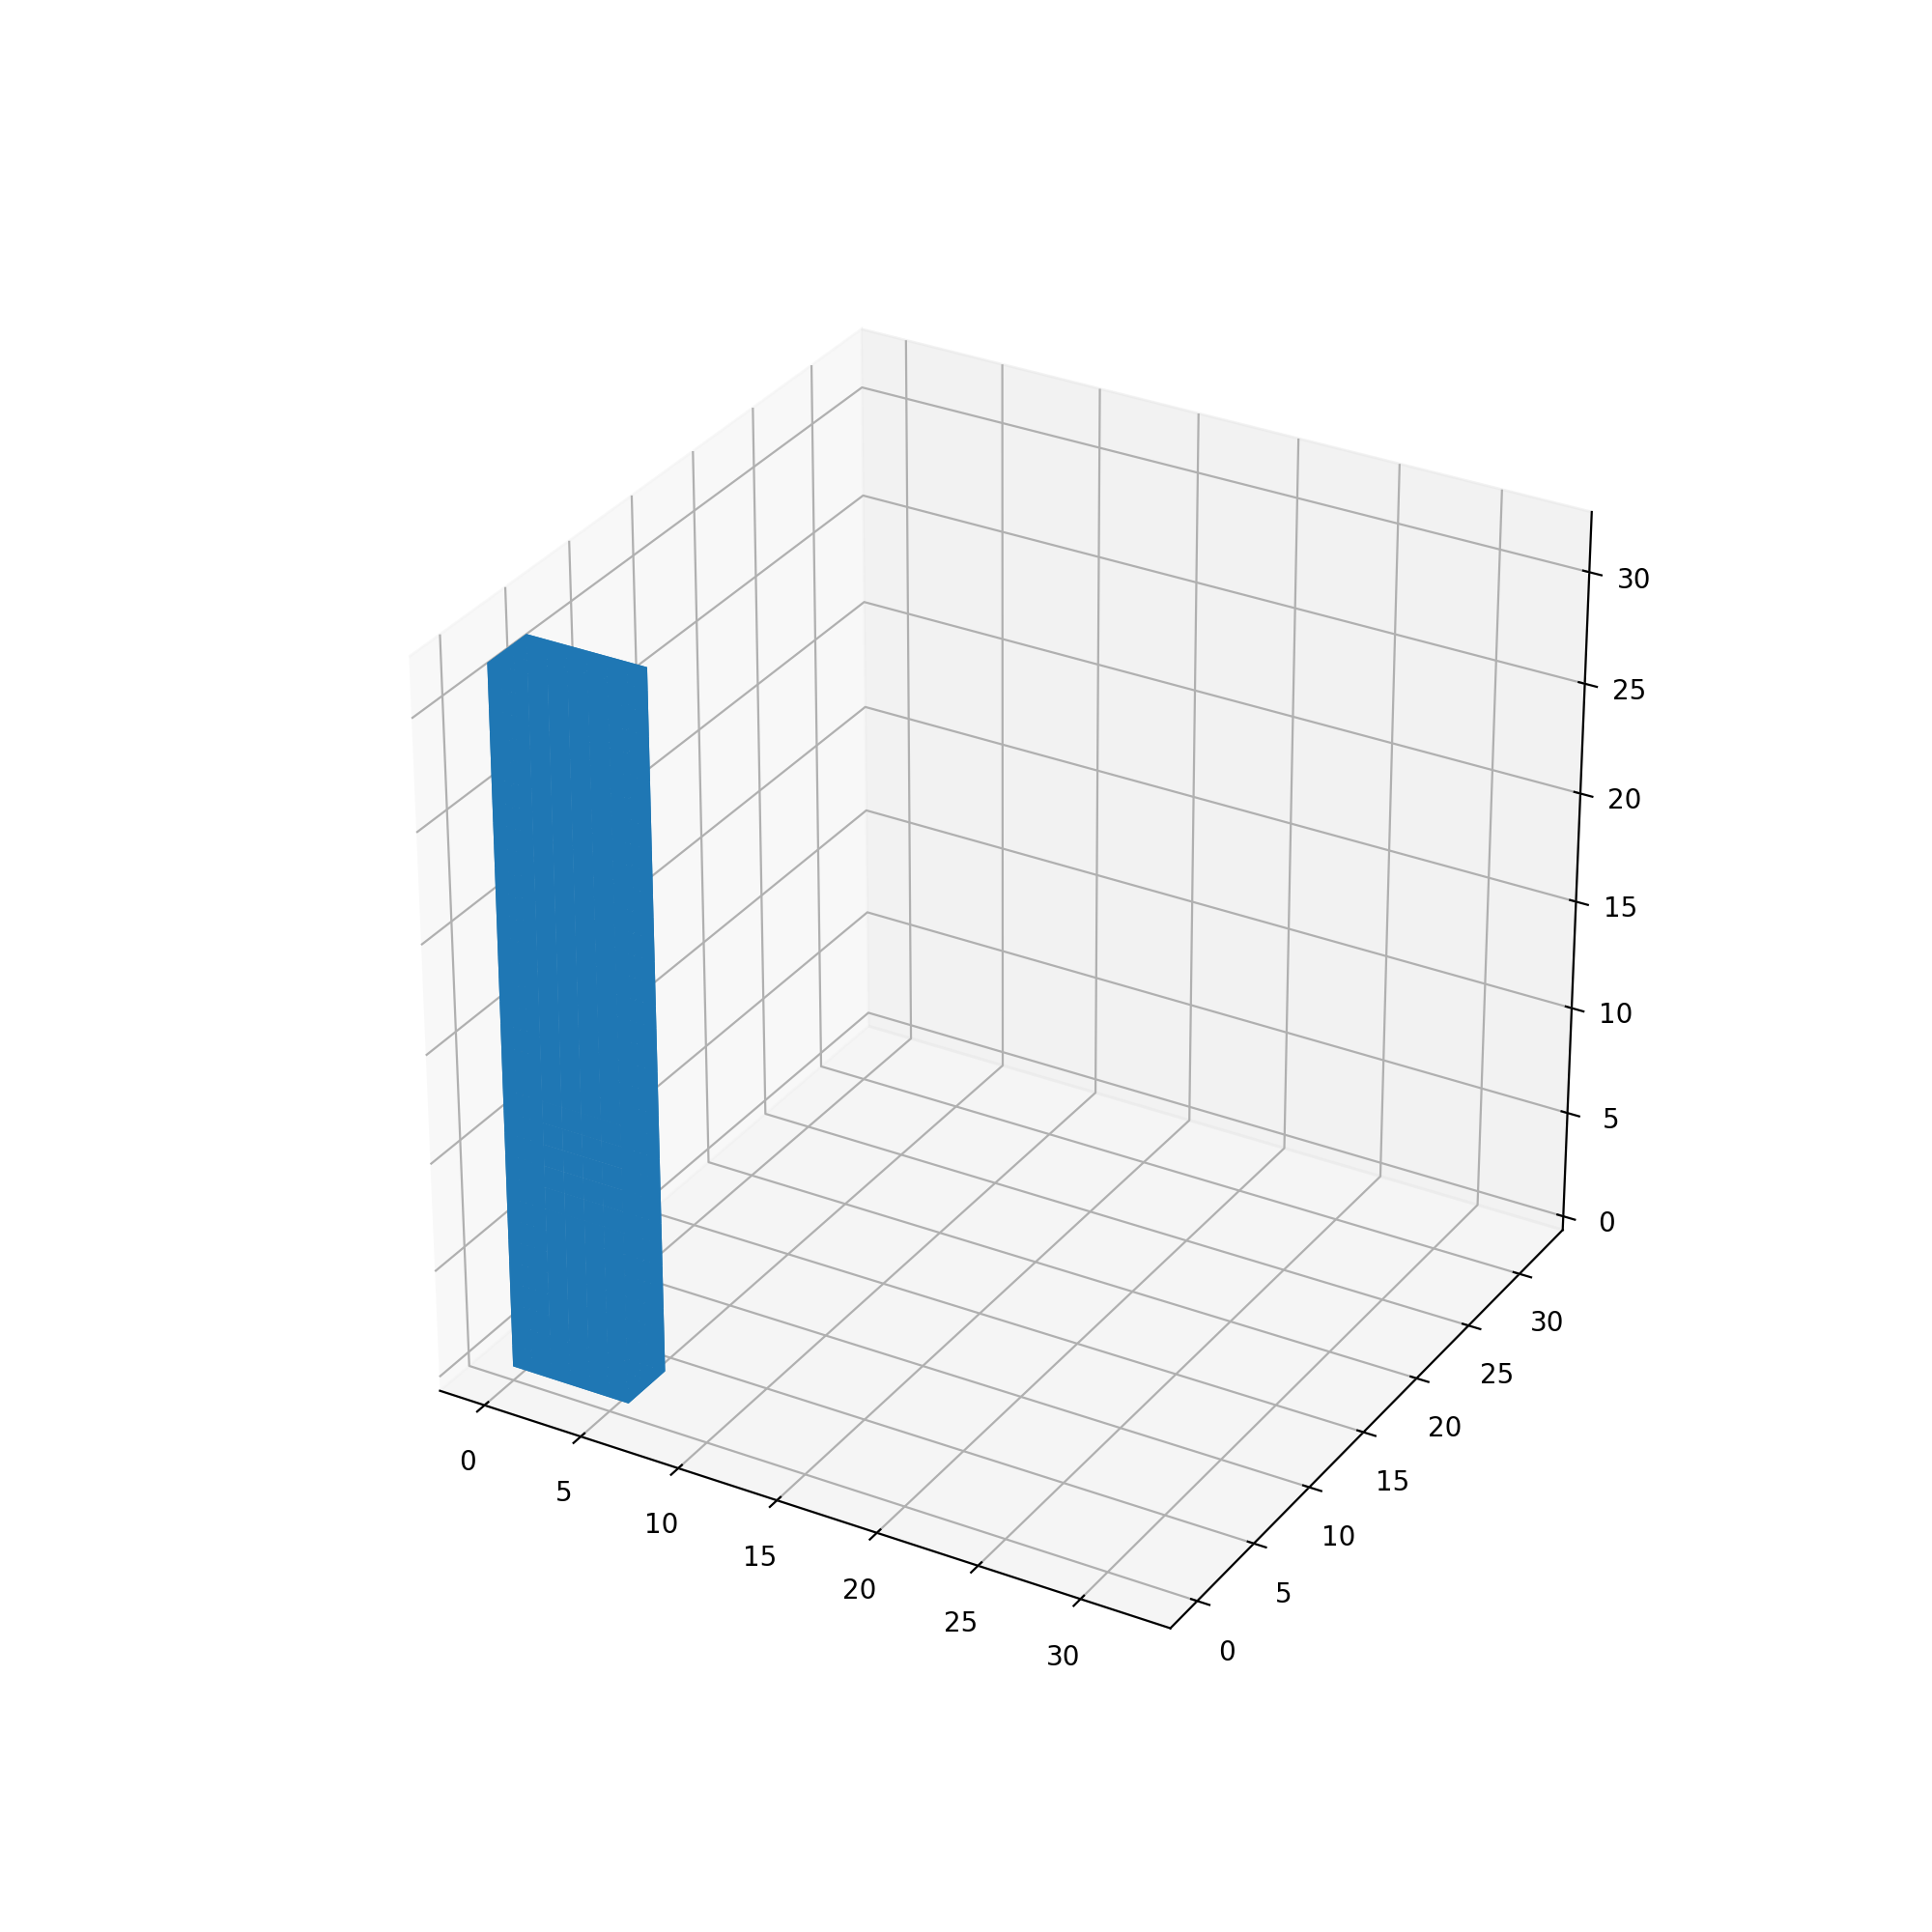

In [10]:
voxels = np.array(labels_train[1,0,:,:,:])

# and plot everything
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
#fig.savefig('VoxelizedFinal.png')
fig.show()

<IPython.core.display.Javascript object>


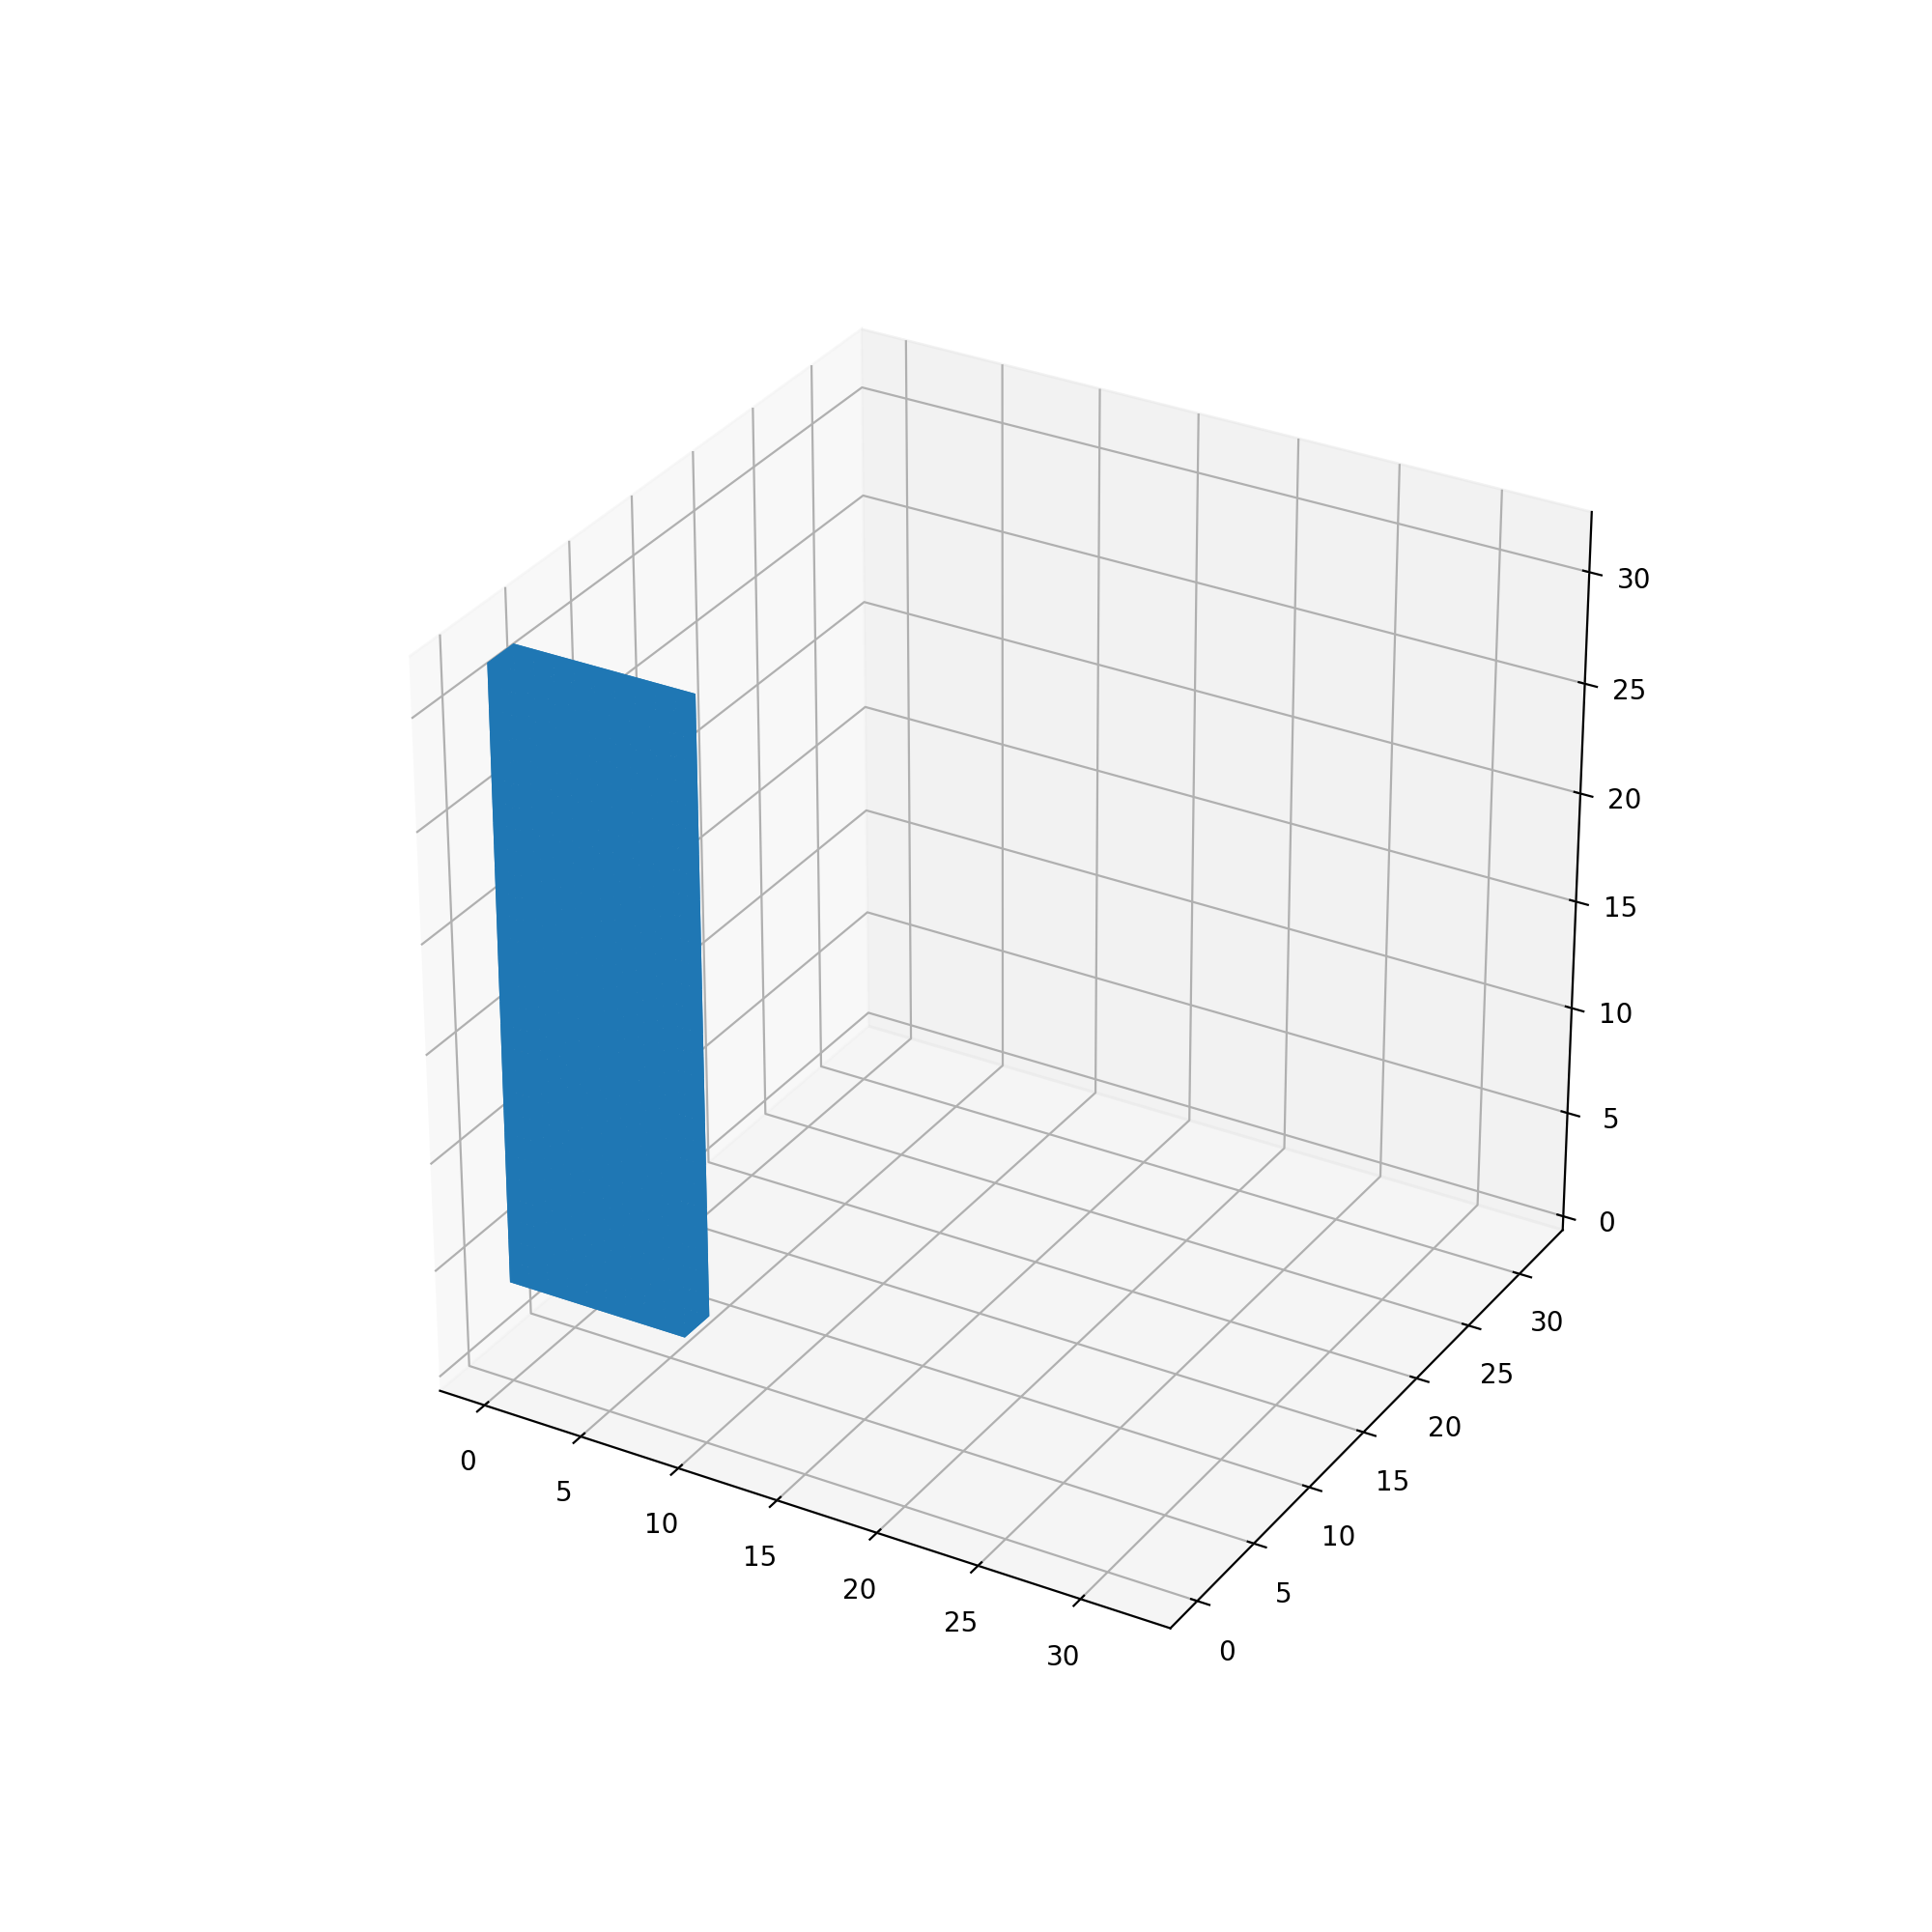

In [11]:
voxels = np.array(labels_train[2,0,:,:,:])

# and plot everything
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
#fig.savefig('VoxelizedFinal.png')
fig.show()